# Project 2: Ames Housing Data and Kaggle Challenge)



--- 

# Part 1: Problem Statement
---


## 1.1 Problem statement

The Housing Department, City of Ames, is working towards the development of the best actionable and explainable house price prediction model based on the Ames housing dataset from 2010 for the use in city's decision making and policy development.

## 1.2 Background

Ames is the 9th largest city of the State of Iowa with the current population of 66,427 people (August 2022). According to the 2021 census, the largest population group are students, followed by locals who practice agriculture. Therefore, more than half of the households in Ames are non-family type and 40.50% of the population are between 18-24 years old. This is not a surprising number since Ames is the home of Iowa State University. (United States Cencus Bureau, 2021, https://www.census.gov/quickfacts/amescityiowa)

In regard to the population landscape of Ames, the Housing Division, City of Ames, is currently working towards the development of a Price Prediction Model that is actionable and explainable based on the current Ames housing dataset from 2010.By developing the price prediction model, City of Ames hope that this will help in the decision making process of the City Council, resulting in not only a better urban development plan, equitable and affordable housing policy, but also a better appraisal price with the return in a more accurate annual tax return.


## 1.3 Outside Research

1.3.1 Housing Market and Urban Development\
There is strong linkage between housing market and urban development in most of the countries around the world. Even though the national housing market landscape may differ, but it is necessary for the government to consider changes in house price in urban planning and urban development. 
(Gurran/Bramley, 2017, https://link.springer.com/content/pdf/bfm:978-1-137-46403-3/1.pdf)
\
\
**1.3.2 Understand US Housing Market**\
Due to the pandemic, which resulted in the decline in housing supply, house prices in the US rises in all of the US states. For Iowa, the price rose at 12.5% when compared to the previous year and 38.1% when compare to the last 5 years.
(Ross, 2022, https://advisor.visualcapitalist.com/growth-in-u-s-house-prices-by-state/)

# Part 2: Data Wrangling
---

## 2.1 Import Package

In [4]:
# import packages 

# import fundamental packages for working with data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import linear regression, train_test_split and linear regression metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics
from sklearn.dummy import DummyRegressor

## 2.2 Data Import and Cleaning

In [5]:
# import Ames train dataset
ames_train = pd.read_csv('../data/train.csv')

In [6]:
# get an overview of the dataset
ames_train.head(2)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900


## 2.3 Data Cleaning

In [7]:
# Sample 10 rows of dataset to see the overall data structure
ames_train.sample(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
494,159,535377090,90,RL,64.0,6979,Pave,NaN,Reg,Lvl,...,0,NaN,GdPrv,Shed,600,6,2010,WD,Normal,144000
928,927,909282130,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,10,2009,WD,Family,144800
208,1388,905200160,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,80000
397,2655,902206090,50,RM,56.0,9576,Pave,NaN,Reg,Lvl,...,0,NaN,GdWo,NaN,0,5,2006,WD,Normal,120000
1496,2354,527365010,60,FV,75.0,9512,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2006,New,Partial,294323
1197,2891,914476500,90,RL,82.0,11070,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2006,WD,Family,171000
1955,1693,528106060,60,RL,110.0,13440,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,3,2007,New,Partial,338931
1297,437,528118060,60,RL,59.0,23303,Pave,NaN,IR3,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Family,409900
1588,2609,535402100,80,RL,83.0,10184,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,165000
639,2725,905201090,20,RL,NaN,14175,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,168000


In [8]:
# Check the number of rows and columns
ames_train.shape

(2197, 82)

In [9]:
# Change column name to lower case and replace blank space with underscore
ames_train.columns = ames_train.columns.str.lower().str.replace(' ', '_')

In [10]:
# Check whether the columns are renamed correctly
ames_train.head()

,order,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000


In [11]:
# Check data information
# Found columns with large number of missing data: 'Alley', 'Pool QC', 'Fence' and 'Misc Feature' 
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order            2197 non-null   int64  
 1   pid              2197 non-null   int64  
 2   ms_subclass      2197 non-null   int64  
 3   ms_zoning        2197 non-null   object 
 4   lot_frontage     1835 non-null   float64
 5   lot_area         2197 non-null   int64  
 6   street           2197 non-null   object 
 7   alley            143 non-null    object 
 8   lot_shape        2197 non-null   object 
 9   land_contour     2197 non-null   object 
 10  utilities        2197 non-null   object 
 11  lot_config       2197 non-null   object 
 12  land_slope       2197 non-null   object 
 13  neighborhood     2197 non-null   object 
 14  condition_1      2197 non-null   object 
 15  condition_2      2197 non-null   object 
 16  bldg_type        2197 non-null   object 
 17  house_style   

In [12]:
# Calculate the number of rows which represents 5% of total rows in the dataset
# This number will later be used as a criteria for feature selection and feature elimination.
round(ames_train.shape[0] * 0.05)

# From the calculation, the criteria for feature removal is when there are less than 
# 110 non-null columns available in the dataset. From the dataset, 
# the only columns that doesn't meet this criteria is 'alley'. 
# Hence, this column will be dropped.

110

In [13]:
# Drop the column 'alley' since it doesn't pass the minimum criteria of 5% non-null cells 
# Hence, this columns may not contribute much to the model since there are not enough data provided.
ames_train.drop(columns=['alley'], inplace=True)

In [14]:
# Call the column 'pool_area' and 'pool_qc' to see what are inside and whether to drop these columns.
ames_train[(ames_train['pool_area'] != 0)][['pool_area', 'pool_qc']]

,pool_area,pool_qc
50,738,Gd
133,576,Gd
177,555,Ex
672,480,Gd
956,512,Ex
967,648,Fa
1220,368,TA
1494,519,Fa
1714,144,Ex
1796,800,Gd


In [15]:
# Drop columns 'pool_area' and 'pool_qc' since there are only 12 datapoints which is not 0, 
# Meaning that there are only 12 houses with pool as a starting point for analysis. 
# This is not enough.
ames_train.drop(columns=['pool_area', 'pool_qc'], inplace=True)

In [16]:
# Understand the 'misc_feature' and 'misc_value' columns
ames_train[['misc_feature', 'misc_val']]

,misc_feature,misc_val
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
...,...,...
2192,NaN,0
2193,NaN,0
2194,NaN,0
2195,Shed,400


In [17]:
# Check how many datapoints are in the column 'misc_cal' when grouped by 'misc_feature'
ames_train.groupby(['misc_feature'])['misc_val'].agg('count')

misc_feature
Elev     1
Gar2     3
Othr     3
Shed    72
TenC     1
Name: misc_val, dtype: int64

In [18]:
# Drop 'misc_feature' and 'misc_val' columns because the value in each category is not enough.
# Apart from that, the number of total values also doesn't pass the 5% treshold.
# Hence, these columns will be dropped

ames_train.drop(columns=['misc_feature', 'misc_val'], inplace=True)

In [19]:
# Recheck dataset info
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order            2197 non-null   int64  
 1   pid              2197 non-null   int64  
 2   ms_subclass      2197 non-null   int64  
 3   ms_zoning        2197 non-null   object 
 4   lot_frontage     1835 non-null   float64
 5   lot_area         2197 non-null   int64  
 6   street           2197 non-null   object 
 7   lot_shape        2197 non-null   object 
 8   land_contour     2197 non-null   object 
 9   utilities        2197 non-null   object 
 10  lot_config       2197 non-null   object 
 11  land_slope       2197 non-null   object 
 12  neighborhood     2197 non-null   object 
 13  condition_1      2197 non-null   object 
 14  condition_2      2197 non-null   object 
 15  bldg_type        2197 non-null   object 
 16  house_style      2197 non-null   object 
 17  overall_qual  

### 2.3.1 Impute Data

In [20]:
# Count total missing values in each columns
count_na = ames_train.isna().sum().sort_values(ascending=False)
count_na[count_na != 0]

fence             1778
fireplace_qu      1066
lot_frontage       362
garage_cond        122
garage_yr_blt      122
garage_finish      122
garage_qual        122
garage_type        120
bsmt_exposure       69
bsmtfin_type_2      68
bsmt_qual           67
bsmt_cond           67
bsmtfin_type_1      67
mas_vnr_area        22
mas_vnr_type        22
garage_cars          1
total_bsmt_sf        1
garage_area          1
bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
bsmt_half_bath       1
bsmt_full_bath       1
electrical           1
dtype: int64

In [21]:
# Group data by fence and see how many datapoints are in this column
ames_train.groupby(['fence'])['order'].agg('count')

fence
GdPrv     79
GdWo      86
MnPrv    243
MnWw      11
Name: order, dtype: int64

In [22]:
# As the number of available datapoints is above the 5% treshold.
# The null values in 'fence' should be imputed
# According to the data description, NA value imply that the lot has no fence 
# Hence, null values shall be filled with 'no_fence'
ames_train['fence'].fillna('no_fence', inplace = True)

In [23]:
# Recheck 
ames_train['fence']

0       no_fence
1       no_fence
2       no_fence
3       no_fence
4       no_fence
          ...   
2192    no_fence
2193    no_fence
2194    no_fence
2195    no_fence
2196    no_fence
Name: fence, Length: 2197, dtype: object

In [24]:
# Call 'fireplace_quality' to see how it looks like
ames_train['fireplace_qu'].value_counts()

Gd    564
TA    454
Fa     50
Po     33
Ex     30
Name: fireplace_qu, dtype: int64

In [25]:
# Similar to 'fence', it is stated in the data description that na means no fireplace
# Therefore, let's fill na in 'fire_qu' with 'no_fireplace'
ames_train['fireplace_qu'].fillna('no_fireplace', inplace = True)

In [26]:
# Recheck
ames_train['fireplace_qu']

0       no_fireplace
1                 TA
2                 Gd
3                 Gd
4       no_fireplace
            ...     
2192              TA
2193              Gd
2194              TA
2195    no_fireplace
2196              Gd
Name: fireplace_qu, Length: 2197, dtype: object

In [27]:
# Call 'lot_frontage' to check missing values
# Group 'lot_frontage' by 'lot_config' because lot configuration influence lot frontage (area connected to the street) most
ames_train.groupby(['lot_config'])['lot_frontage'].agg(['mean', 'median', 'count', 'min', 'max'])

,mean,median,count,min,max
lot_config,,,,,
Corner,83.182432,81.0,296,24.0,313.0
CulDSac,57.986842,50.0,76,25.0,168.0
FR2,60.660377,60.0,53,24.0,195.0
FR3,79.300000,66.0,10,35.0,129.0
Inside,67.561429,67.0,1400,21.0,200.0


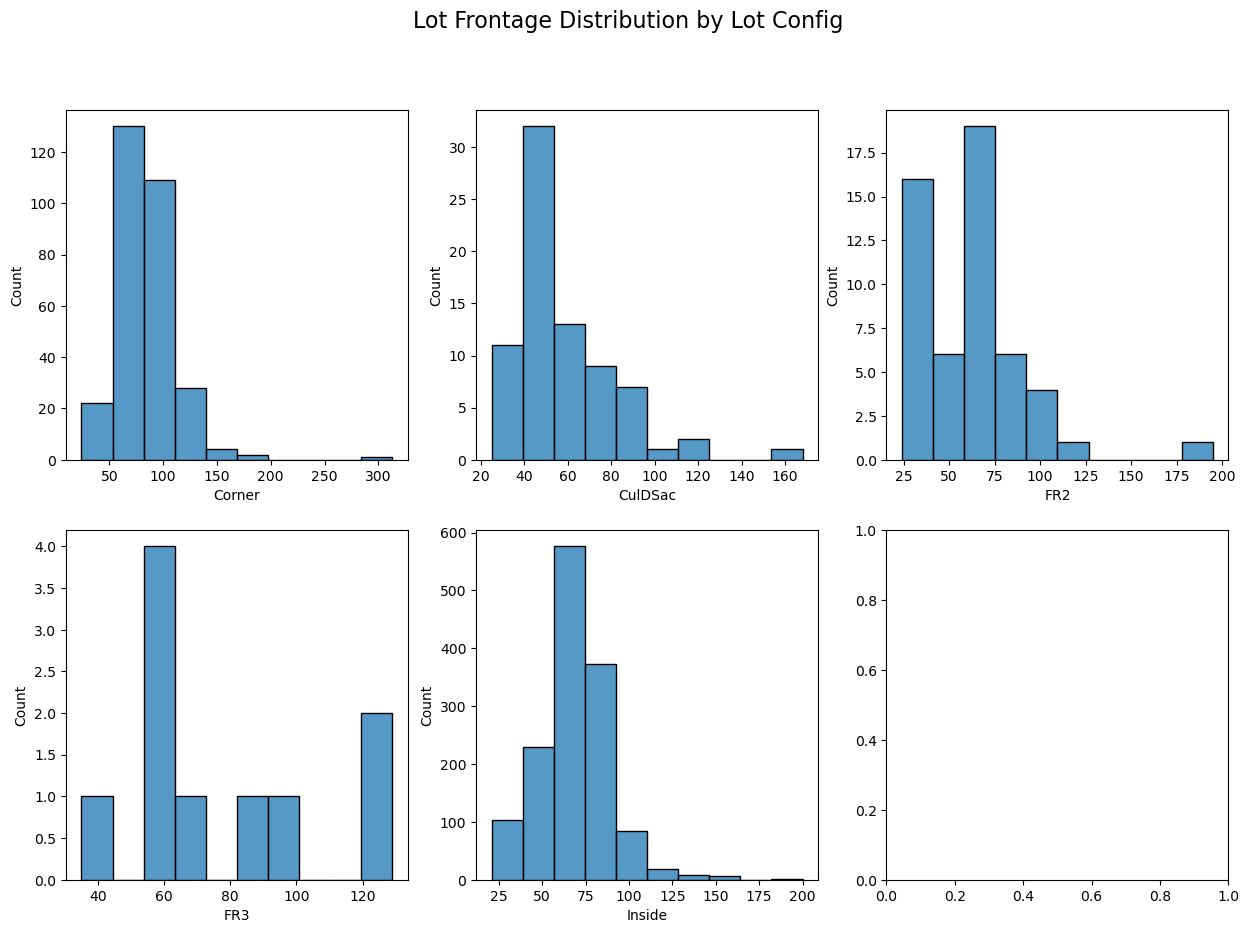

In [28]:
# Visualiza the value distribution with histogram
fig, ax = plt.subplots(2, 3, figsize=(15,10))

# Lot config and lot frontage
fig.suptitle('Lot Frontage Distribution by Lot Config', fontsize = 16)
sns.histplot(ames_train[ames_train['lot_config'] == 'Corner']['lot_frontage'],
             bins=10, ax=ax[0][0])
sns.histplot(ames_train[ames_train['lot_config'] == 'CulDSac']['lot_frontage'],
             bins=10, ax=ax[0][1])
sns.histplot(ames_train[ames_train['lot_config'] == 'FR2']['lot_frontage'],
             bins=10, ax=ax[0][2])
sns.histplot(ames_train[ames_train['lot_config'] == 'FR3']['lot_frontage'],
             bins=10, ax=ax[1][0])
sns.histplot(ames_train[ames_train['lot_config'] == 'Inside']['lot_frontage'],
             bins=10, ax=ax[1][1])

ax[0][0].set(xlabel='Corner')
ax[0][1].set(xlabel='CulDSac')
ax[0][2].set(xlabel='FR2')
ax[1][0].set(xlabel='FR3')
ax[1][1].set(xlabel='Inside');

In [29]:
# Fill na in 'lot_frontage' with the median value of lot frontage when group by 'lot config'
# Use median value to fill na since the distribution is right skewed and median is thus more appropriate than mean
# Fill na in lot_frontage with the median of lot_config == corner
mask = (ames_train['lot_config'] == 'Corner')
median_corner = ames_train.loc[mask, 'lot_frontage'].median()
ames_train.loc[mask, 'lot_frontage'] = ames_train.loc[mask, 'lot_frontage'].fillna(median_corner)

In [30]:
# Fill na in lot_frontage with the median of lot_config == CulDSac
mask = (ames_train['lot_config'] == 'CulDSac')
median_culdsac = ames_train.loc[mask, 'lot_frontage'].median()
ames_train.loc[mask, 'lot_frontage'] = ames_train.loc[mask, 'lot_frontage'].fillna(median_culdsac)

In [31]:
# Fill na in lot_frontage with the median of lot_config == FR2
mask = (ames_train['lot_config'] == 'FR2')
median_fr2 = ames_train.loc[mask, 'lot_frontage'].median()
ames_train.loc[mask, 'lot_frontage'] = ames_train.loc[mask, 'lot_frontage'].fillna(median_fr2)

In [32]:
# Fill na in lot_frontage with the median of lot_config == FR3
mask = (ames_train['lot_config'] == 'FR3')
median_fr3 = ames_train.loc[mask, 'lot_frontage'].median()
ames_train.loc[mask, 'lot_frontage'] = ames_train.loc[mask, 'lot_frontage'].fillna(median_fr2)

In [33]:
# Fill na in lot_frontage with the median of lot_config == Inside
mask = (ames_train['lot_config'] == 'Inside')
median_inside = ames_train.loc[mask, 'lot_frontage'].median()
ames_train.loc[mask, 'lot_frontage'] = ames_train.loc[mask, 'lot_frontage'].fillna(median_inside)

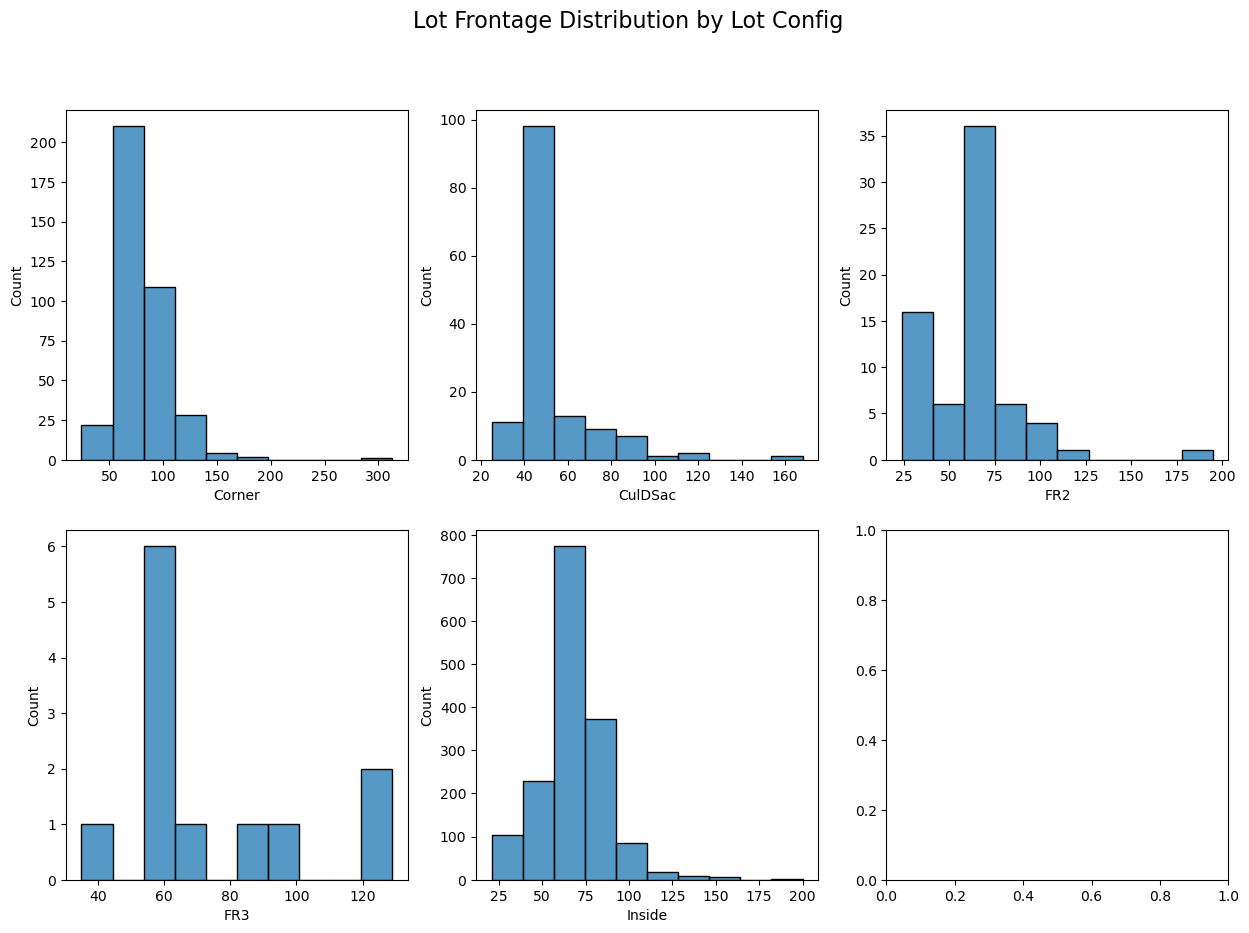

In [34]:
# Feckeck the new value distribution with histogram
fig, ax = plt.subplots(2, 3, figsize=(15,10))

# Lot config and lot frontage
fig.suptitle('Lot Frontage Distribution by Lot Config', fontsize = 16)
sns.histplot(ames_train[ames_train['lot_config'] == 'Corner']['lot_frontage'],
             bins=10, ax=ax[0][0])
sns.histplot(ames_train[ames_train['lot_config'] == 'CulDSac']['lot_frontage'],
             bins=10, ax=ax[0][1])
sns.histplot(ames_train[ames_train['lot_config'] == 'FR2']['lot_frontage'],
             bins=10, ax=ax[0][2])
sns.histplot(ames_train[ames_train['lot_config'] == 'FR3']['lot_frontage'],
             bins=10, ax=ax[1][0])
sns.histplot(ames_train[ames_train['lot_config'] == 'Inside']['lot_frontage'],
             bins=10, ax=ax[1][1])

ax[0][0].set(xlabel='Corner')
ax[0][1].set(xlabel='CulDSac')
ax[0][2].set(xlabel='FR2')
ax[1][0].set(xlabel='FR3')
ax[1][1].set(xlabel='Inside');

In [35]:
# Check statistic summary after na is filled with new values
ames_train.groupby(['lot_config'])['lot_frontage'].agg(['mean', 'median', 'count', 'min', 'max'])

,mean,median,count,min,max
lot_config,,,,,
Corner,82.718085,81.0,376,24.0,313.0
CulDSac,54.274648,50.0,142,25.0,168.0
FR2,60.500000,60.0,70,24.0,195.0
FR3,76.083333,61.0,12,35.0,129.0
Inside,67.492173,67.0,1597,21.0,200.0


In [36]:
# Check missing values in 'garage_X' columns
ames_train[ames_train['garage_cond'].isna()][['garage_cond', 'garage_yr_blt', 'garage_finish', 'garage_qual', 'garage_type']]

,garage_cond,garage_yr_blt,garage_finish,garage_qual,garage_type
39,NaN,NaN,NaN,NaN,NaN
43,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2121,NaN,NaN,NaN,NaN,NaN
2144,NaN,NaN,NaN,NaN,NaN
2153,NaN,NaN,NaN,NaN,NaN
2175,NaN,NaN,NaN,NaN,NaN


In [37]:
# Similar to 'fence' and 'fireplace', na in these fields indicate that there is no garage present as stated in the data description
# Thus, let's fill missing values in columns related to garage with 'no_garage'
# Fill 'garage_cond' with 'no_gerage'
ames_train['garage_cond'].fillna('no_garage', inplace=True)

In [38]:
# Fill garage_yr_blt missing values with 0
ames_train['garage_yr_blt'].fillna(0, inplace = True)

In [39]:
# Fill garage_finish missing values with no_garage
ames_train['garage_finish'].fillna('no_garage', inplace = True)

In [40]:
# Fill garage_quality missing values with no_garage
ames_train['garage_qual'].fillna('no_garage', inplace = True)

In [41]:
# Fill garage_type missing values with no_garage
ames_train['garage_type'].fillna('no_garage', inplace = True)

In [42]:
# Let's clean missing value in columns related to 'basement'
# Check unique values in 'bsmt_qual' column
ames_train['bsmt_qual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa', nan, 'Po'], dtype=object)

In [43]:
# Similar to na values in previous sections, let's fill na with 'no_basement' as described in the data dictionary.
ames_train['bsmt_qual'].fillna('no_basement', inplace=True)
ames_train['bsmtfin_type_1'].fillna('no_basement', inplace=True)
ames_train['bsmt_cond'].fillna('no_basement', inplace=True)
ames_train['bsmtfin_type_2'].fillna('no_basement', inplace=True)

In [44]:
# 'bsmt_exposure' is more complicated than other columns, because it can be the case that there is 'no_exposure' or 'no_basement'
# Check 'bsmt_exposure' missing data and 'bsmt_cond'
ames_train[(ames_train['bsmt_exposure'].isna())][['bsmt_cond', 'bsmt_exposure']]

,bsmt_cond,bsmt_exposure
99,no_basement,NaN
141,no_basement,NaN
162,no_basement,NaN
165,no_basement,NaN
168,no_basement,NaN
...,...,...
2020,no_basement,NaN
2024,no_basement,NaN
2043,no_basement,NaN
2059,no_basement,NaN


In [45]:
# Fill na in 'bsmt_exposure' with 'no_basement' if the value in 'bsmt_cond' is 'no_basement'
ames_train.loc[ames_train['bsmt_cond']=='no_basement','bsmt_exposure']='no_basement'

In [46]:
# Ctherwise, fill na in 'bsmt_exposure' with 'no_exposure'
ames_train['bsmt_exposure'].fillna('no_exposure', inplace=True)

In [47]:
# Check missing value in 'total_bsmt_sf' and call other columns related to basement to compare
ames_train[ames_train['total_bsmt_sf'].isna()][['bsmt_cond', 'bsmt_full_bath', 'bsmt_unf_sf',\
                                                'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_half_bath',\
                                                'total_bsmt_sf']]

,bsmt_cond,bsmt_full_bath,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_half_bath,total_bsmt_sf
1384,no_basement,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Fill na with 0 in total_bsmt_sf column because basement is not present in this house
ames_train['bsmt_full_bath'].fillna(0, inplace=True)
ames_train['bsmt_unf_sf'].fillna(0, inplace=True)
ames_train['bsmtfin_sf_1'].fillna(0, inplace=True)
ames_train['bsmtfin_sf_2'].fillna(0, inplace=True)
ames_train['bsmt_half_bath'].fillna(0, inplace=True)
ames_train['total_bsmt_sf'].fillna(0, inplace=True)

In [49]:
# Check missing values in 'mas_vnr_area' and 'mas_vnr_type'
ames_train[ames_train['mas_vnr_area'].isna()][['mas_vnr_area', 'mas_vnr_type']].head()

,mas_vnr_area,mas_vnr_type
87,NaN,NaN
384,NaN,NaN
529,NaN,NaN
570,NaN,NaN
679,NaN,NaN


In [50]:
# Check pattern in mas_type is none
# It can be seen that there is a pattern, in which if 'mas_vnr_type' == 'None, 'mas_vnr_area' == 0.0
ames_train[ames_train['mas_vnr_type'] == 'None'][['mas_vnr_type', 'mas_vnr_area']].head()

,mas_vnr_type,mas_vnr_area
0,None,0.0
4,None,0.0
5,None,0.0
6,None,0.0
7,None,0.0


In [51]:
# Fill missing value in mas_type with 'None', which refers to no masonary
ames_train['mas_vnr_type'].fillna('None', inplace=True)

In [52]:
# Fill missing value in mas_area with 0
ames_train['mas_vnr_area'].fillna(0, inplace=True)

In [53]:
# Check pattern of electrical column when group by utilities 
ames_train.groupby(['utilities', 'electrical'])['electrical'].count()

utilities  electrical
AllPub     FuseA          128
           FuseF           38
           FuseP            6
           Mix              1
           SBrkr         2020
NoSeWa     FuseA            1
NoSewr     FuseA            2
Name: electrical, dtype: int64

In [54]:
# Fill na in 'electrical' with 'SBrkr', which is the most frequent value occured
ames_train['electrical'].fillna('SBrkr', inplace=True)

In [55]:
# Check missing values related to 'garage'
ames_train[(ames_train['garage_cars'].isna()) & (ames_train['garage_area'].isna())]\
[['garage_type', 'garage_finish', 'garage_cars', 'garage_area']]

,garage_type,garage_finish,garage_cars,garage_area
761,Detchd,no_garage,NaN,NaN


In [56]:
# Fill na in 'garage_cars' and 'area' with 0 because there is no garage present in this lot
ames_train['garage_cars'].fillna(0, inplace=True)
ames_train['garage_area'].fillna(0, inplace=True)

In [57]:
# Check missing values in the dataset > no missing value > we can now proceed to the next stage!
count_na = ames_train.isna().sum().sort_values(ascending=False)
count_na[count_na != 0]

Series([], dtype: int64)

### 2.3.2 Clean Outliers 

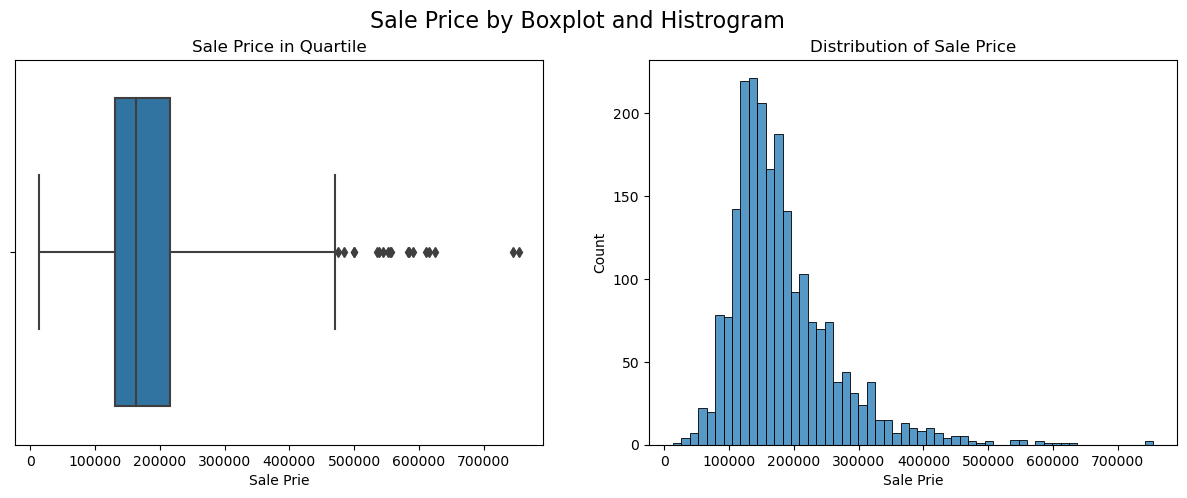

In [58]:
# Identify outliers in 'saleprice' with boxplot and use 3 IQR as criteria 
fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Sale Price by Boxplot and Histrogram', fontsize = 16)
sns.boxplot(x = ames_train['saleprice'], whis = 3, ax=ax[0]).set_title('Sale Price in Quartile')
sns.histplot(x = ames_train['saleprice'], ax=ax[1]).set_title('Distribution of Sale Price')

ax[0].set(xlabel='Sale Prie')
ax[1].set(xlabel='Sale Prie');

In [59]:
# Find IQR in price columns
Q1 = ames_train['saleprice'].quantile(0.25)
Q3 = ames_train['saleprice'].quantile(0.75)
IQR = Q3 - Q1

In [60]:
# Filter outliers in price column
ames_train = ames_train[(ames_train['saleprice'] < Q3 + 3*IQR)]

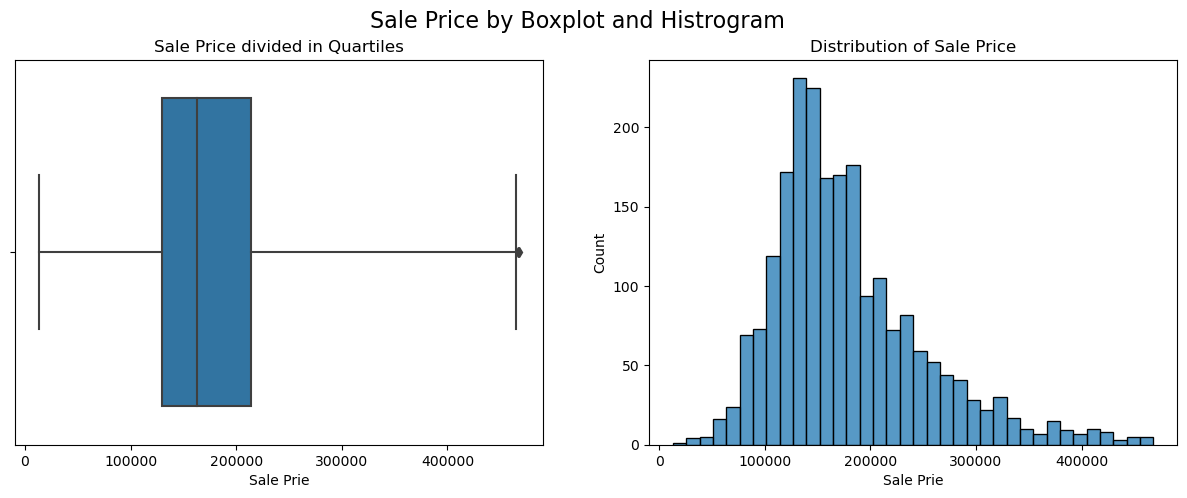

In [61]:
# Price distribution after removing outliers
fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Sale Price by Boxplot and Histrogram', fontsize = 16)

sns.boxplot(x = ames_train['saleprice'], whis = 3, ax=ax[0]).set_title('Sale Price divided in Quartiles')
sns.histplot(x = ames_train['saleprice'], ax=ax[1]).set_title('Distribution of Sale Price')

ax[0].set(xlabel='Sale Prie')
ax[1].set(xlabel='Sale Prie');

### 2.3.3 Check Value Types

In [62]:
# Call 'ames_train' to check its information
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2178 entries, 0 to 2196
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order            2178 non-null   int64  
 1   pid              2178 non-null   int64  
 2   ms_subclass      2178 non-null   int64  
 3   ms_zoning        2178 non-null   object 
 4   lot_frontage     2178 non-null   float64
 5   lot_area         2178 non-null   int64  
 6   street           2178 non-null   object 
 7   lot_shape        2178 non-null   object 
 8   land_contour     2178 non-null   object 
 9   utilities        2178 non-null   object 
 10  lot_config       2178 non-null   object 
 11  land_slope       2178 non-null   object 
 12  neighborhood     2178 non-null   object 
 13  condition_1      2178 non-null   object 
 14  condition_2      2178 non-null   object 
 15  bldg_type        2178 non-null   object 
 16  house_style      2178 non-null   object 
 17  overall_qual  

In [63]:
# Drop columns 'order' and 'pid' because they are all unique values and thus will not come in handy for the model
ames_train = ames_train.drop(columns = ['order', 'pid'])

In [64]:
# Change month and year columns to object
ames_train[['garage_yr_blt', 'mo_sold', 'yr_sold', 'year_remod/add']] = \
ames_train[['garage_yr_blt', 'mo_sold', 'yr_sold', 'year_remod/add']].astype('object')

In [65]:
# Change ms_subclass to object
ames_train['ms_subclass'] = ames_train['ms_subclass'].astype('object')

# Part 3: EDA, Visualization and Clean Outliers
---

### 3.1 Summary Statistics

In [66]:
# Use .describe() method to see the summary statistics
ames_train.describe()

,lot_frontage,lot_area,overall_qual,overall_cond,year_built,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,...,totrms_abvgrd,fireplaces,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,saleprice
count,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,...,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000
mean,68.846648,10178.291552,6.087695,5.556933,1971.756198,99.035813,438.114784,48.862718,564.701561,1051.679063,...,6.442608,0.590909,1.770432,472.921947,91.271809,48.471993,22.556933,2.382002,15.313590,178998.803030
std,21.423104,7870.989840,1.400874,1.110653,30.435950,174.289448,455.759828,168.531448,442.940915,444.843309,...,1.562263,0.643151,0.758118,213.098952,119.778699,69.149957,62.291687,22.941400,55.364715,72623.485226
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13100.000000
25%,60.000000,7500.000000,5.000000,5.000000,1954.000000,0.000000,0.000000,0.000000,224.250000,789.000000,...,5.000000,0.000000,1.000000,332.250000,0.000000,0.000000,0.000000,0.000000,0.000000,129900.000000
50%,67.000000,9455.000000,6.000000,5.000000,1974.000000,0.000000,362.500000,0.000000,466.500000,993.000000,...,6.000000,1.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11611.250000,7.000000,6.000000,2001.750000,160.000000,734.000000,0.000000,808.000000,1324.750000,...,7.000000,1.000000,2.000000,576.000000,168.000000,71.500000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,...,15.000000,4.000000,5.000000,1488.000000,728.000000,742.000000,584.000000,360.000000,576.000000,468000.000000


### 3.2 Correlation

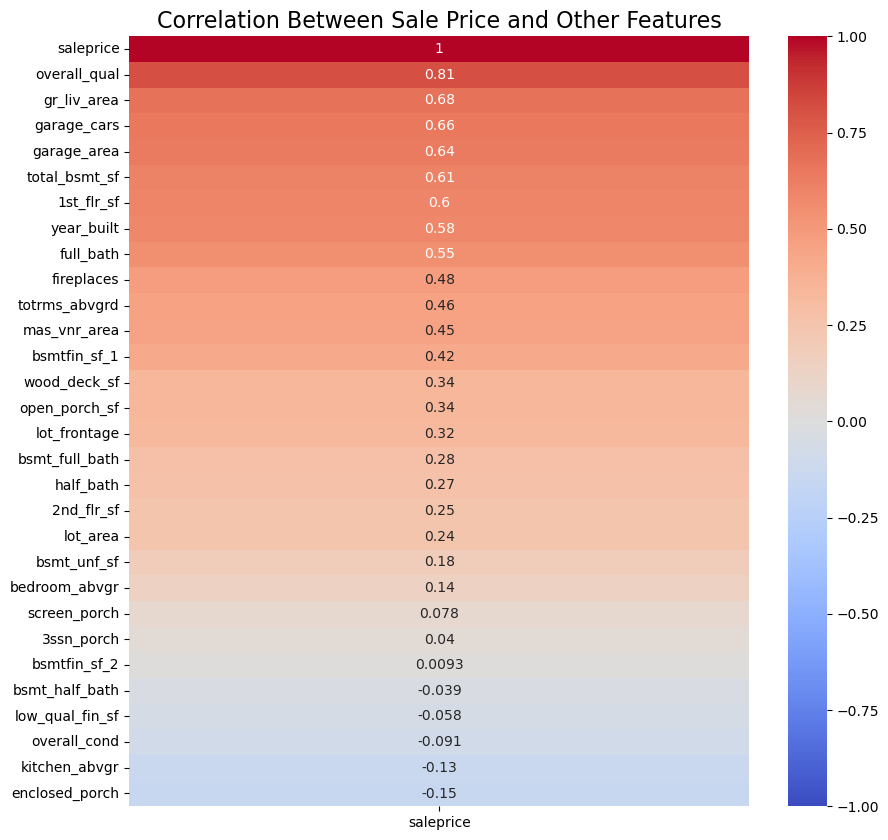

In [67]:
# Identify correlation between each columns and sale price
# Decide to remove 'overall quality' because of multicolinearity, 
# And remove features that have correlation between 0.1 and -0.1. 
plt.figure(figsize=(10,10))
plt.title('Correlation Between Sale Price and Other Features', size=16)
sns.heatmap(ames_train.corr()[['saleprice']].\
            sort_values('saleprice', ascending=False),
            annot = True, vmin = -1, vmax = 1, cmap='coolwarm');

## 3.3 Features Deepdive 

### 3.3.1 Year built

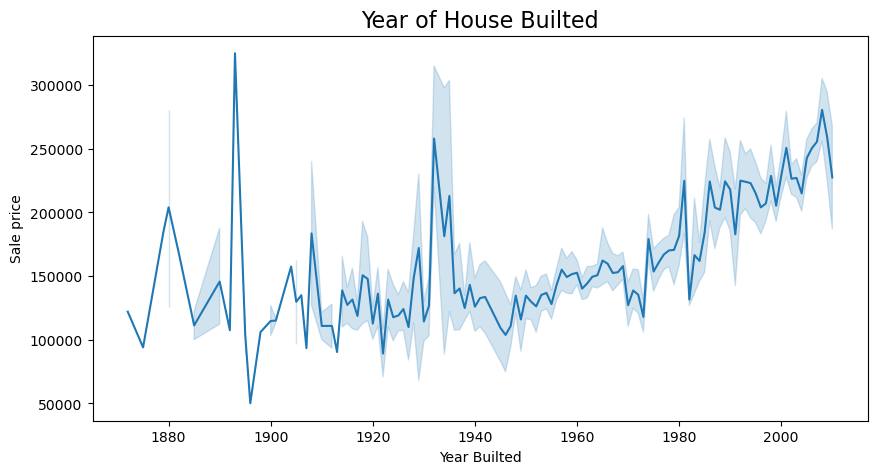

In [68]:
# Plot a line graph to see current trend and 
# the relationship between sale price and year built
plt.figure(figsize=(10,5))
plt.title('Year of House Builted', size=16)

sns.lineplot(x='year_built', y='saleprice', data=ames_train)

plt.xlabel('Year Builted')
plt.ylabel('Sale price');

In [69]:
# Remove outlier that appears around 1900
ames_train[(ames_train['year_built'] < 1900) & (ames_train['saleprice'] > 300000)]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,fence,mo_sold,yr_sold,sale_type,sale_condition,saleprice
1147,75,RM,75.0,13500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,502,0,0,0,no_fence,7,2008,WD,Normal,325000


In [70]:
# Drop row at index 1147
ames_train = ames_train.drop(1147)

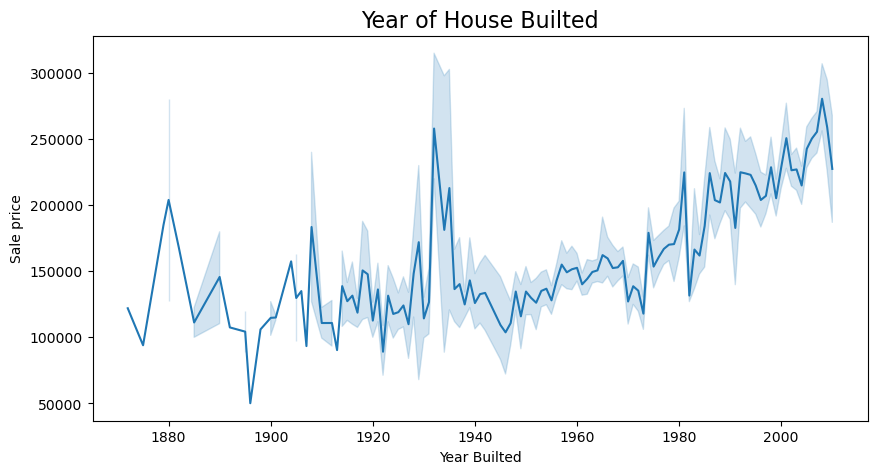

In [71]:
# Recheck after removing outlier
plt.figure(figsize=(10,5))
plt.title('Year of House Builted', size=16)

sns.lineplot(x='year_built', y='saleprice', data=ames_train)

plt.xlabel('Year Builted')
plt.ylabel('Sale price');

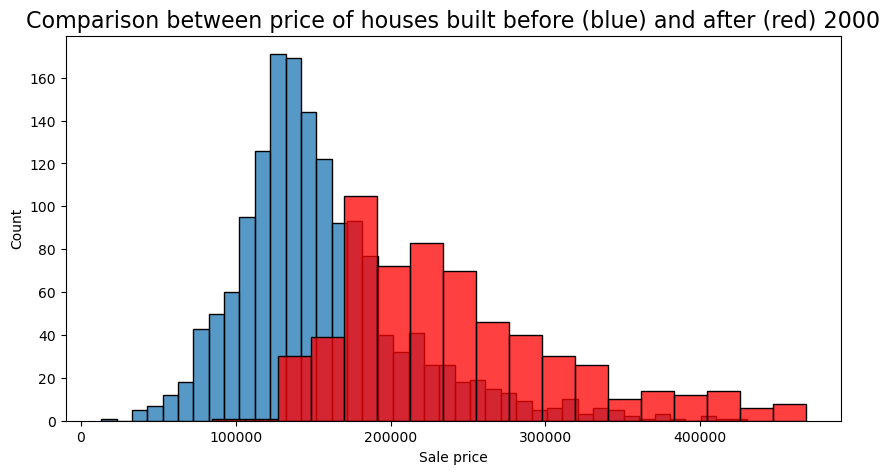

In [72]:
# Plot histogram to compare house price when grouped by year built
# House built after 2000 are sold at higher price
# This factor plays an important role in defining house price.

plt.figure(figsize=(10,5))
plt.title('Comparison between price of houses built before (blue) and after (red) 2000',
          size=16)

sns.histplot(ames_train[ames_train['year_built'] < 2000]['saleprice'])
sns.histplot(ames_train[ames_train['year_built'] >= 2000]['saleprice'], color='red')

plt.xlabel('Sale price');

### 3.3.2 Subclass and Zoning

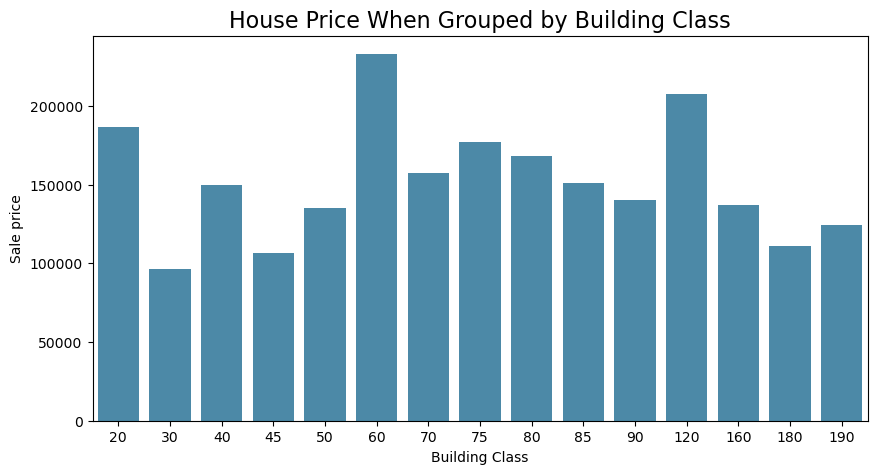

In [73]:
# Plot bar chart displaying the relationship between building class and sale price
plt.figure(figsize=(10,5))
plt.title('House Price When Grouped by Building Class',
          size=16)

sns.barplot(x='ms_subclass', y='saleprice', data=ames_train,
            color='#3D8EB6', ci=False)

plt.xlabel('Building Class')
plt.ylabel('Sale price');

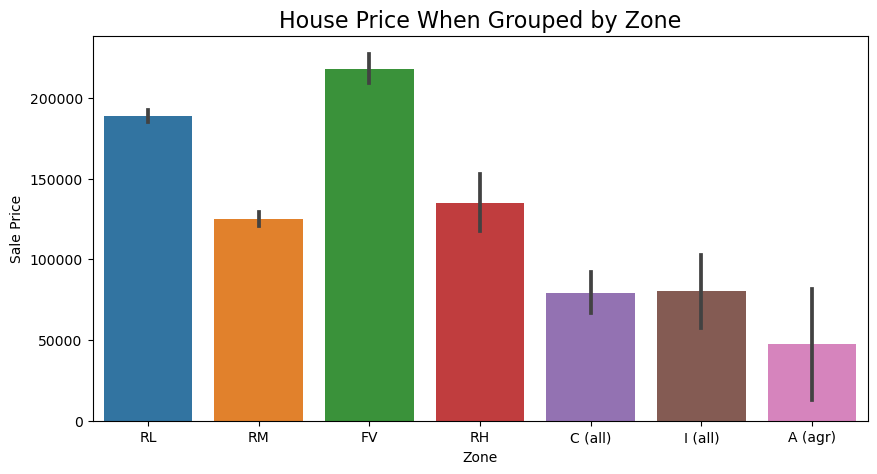

In [74]:
# Plot bar chart displaying the relationship between saleprice and ms_zoning
# Housing in floating village residential area and residential with low density area are priced higher
plt.figure(figsize=(10,5))
plt.title('House Price When Grouped by Zone',
          size=16)
sns.barplot(x='ms_zoning', y='saleprice', data=ames_train)

plt.xlabel('Zone')
plt.ylabel('Sale Price');

### 3.3.3 Overall Condition

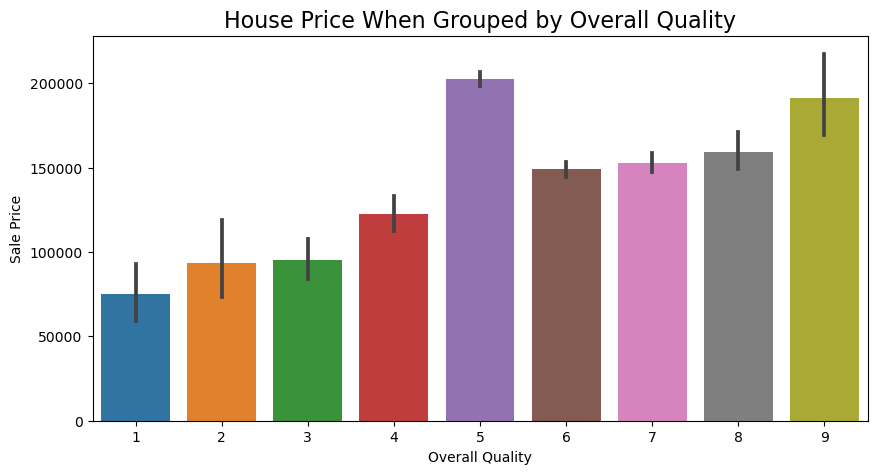

In [75]:
# Plot barchart displaying sale price when groued by overall quality
# The higher house quality, the higher the price
plt.figure(figsize=(10,5))
plt.title('House Price When Grouped by Overall Quality',
          size=16)

sns.barplot(x='overall_cond', y='saleprice', data=ames_train)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price');

### 3.3.4 Neighborhood

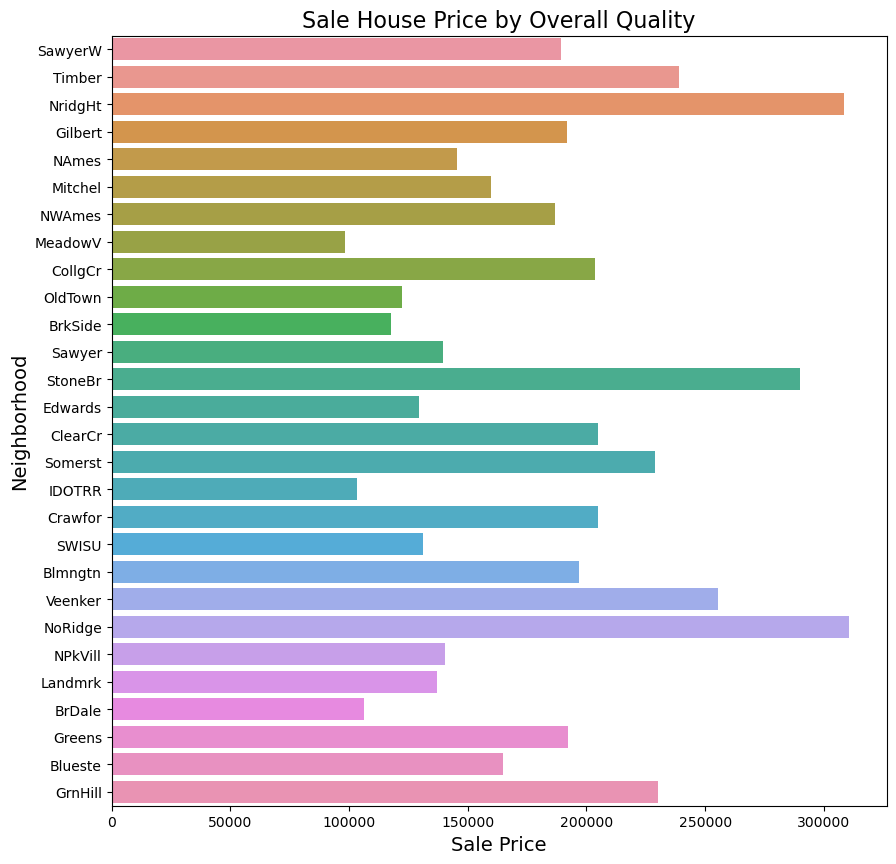

In [76]:
# Plot barchart showing sale price when grouped by neighborhood 
# Different neighborhood have differend average sale price
# This may be an important factor defining house price
plt.figure(figsize = (10, 10))
plt.title('Sale House Price by Overall Quality',
          size = 16)

sns.barplot(x='saleprice', y='neighborhood', data=ames_train, ci=False)

plt.xlabel('Sale Price', size = 14)
plt.ylabel('Neighborhood', size = 14);

### 3.3.5 Lot Area and Lot Frontage

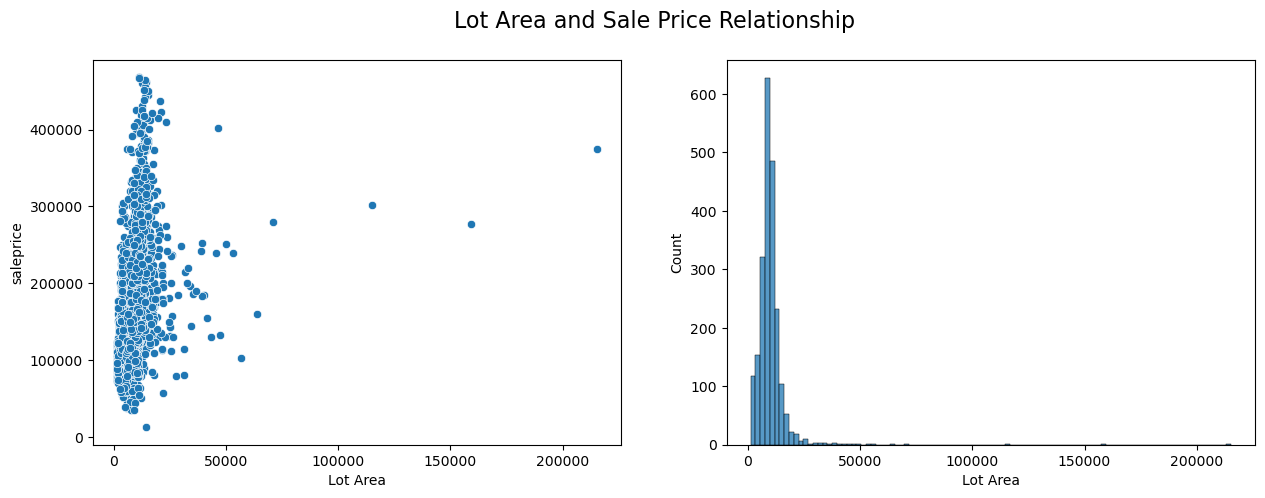

In [77]:
# Use scatterplot and histogram to display the relationship between 'lot_area' and 'saleprice'
# The outliers become visible.
fig, ax = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle('Lot Area and Sale Price Relationship', fontsize = 16)

sns.scatterplot(x='lot_area', y='saleprice', data=ames_train, ax=ax[0])
sns.histplot(x='lot_area', data=ames_train, bins=100, ax=ax[1])

ax[0].set(xlabel='Lot Area')
ax[1].set(xlabel='Lot Area');


In [78]:
# Remove 'lot_area" whose size is bigger than 20,000 square feet.
ames_train = ames_train[ames_train['lot_area'] < 20_000]

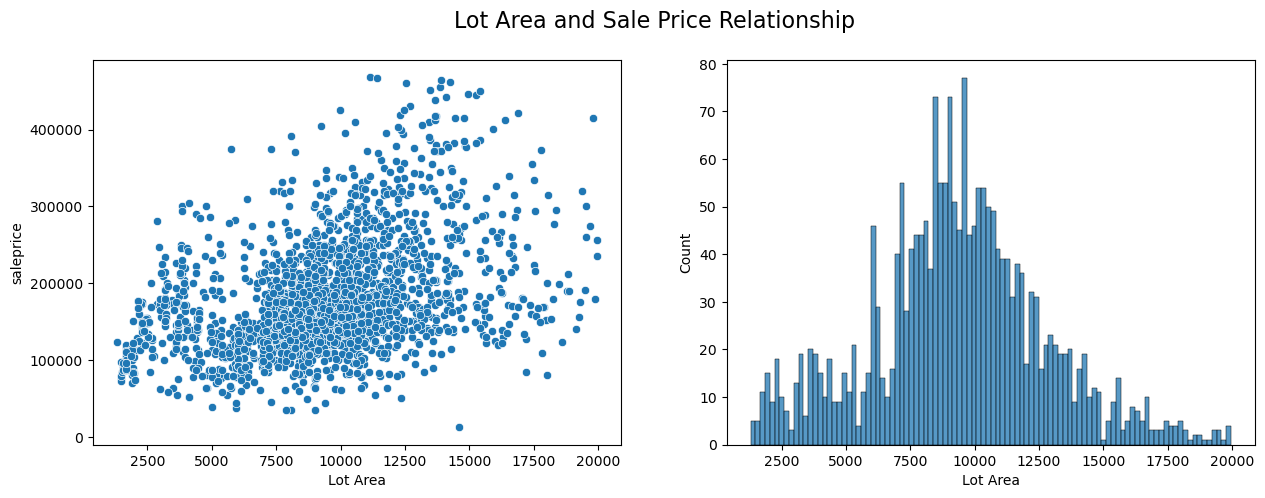

In [79]:
# Recheck after removing outliers in 'lot_area'
fig, ax = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle('Lot Area and Sale Price Relationship', fontsize = 16)

sns.scatterplot(x='lot_area', y='saleprice', data=ames_train, ax=ax[0])
sns.histplot(x='lot_area', data=ames_train, bins=100, ax=ax[1])

ax[0].set(xlabel='Lot Area')
ax[1].set(xlabel='Lot Area');

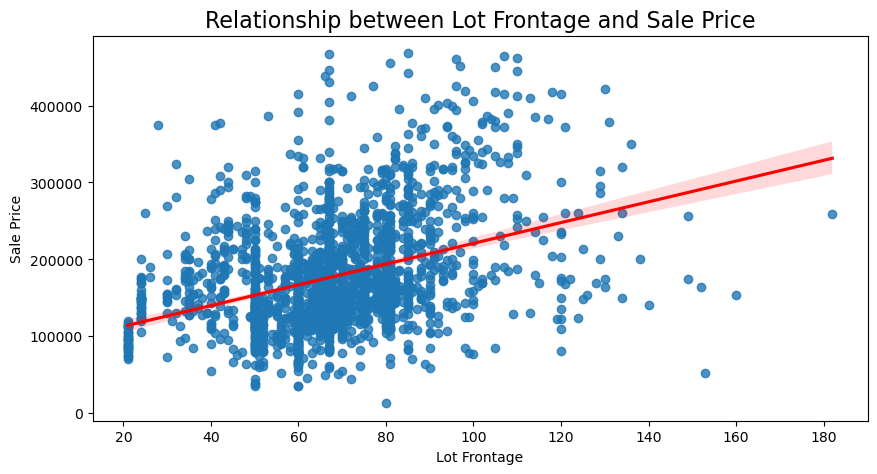

In [80]:
# Use regplot to display the relationship between 'lot_frontage' and 'saleprice'
# The relationship is linear
plt.figure(figsize = (10, 5))
plt.title('Relationship between Lot Frontage and Sale Price',
          size = 16)

sns.regplot(x='lot_frontage', y='saleprice', data=ames_train,
            line_kws={"color": "red"})

plt.xlabel('Lot Frontage')
plt.ylabel('Sale Price');

### 3.3.6 Garage

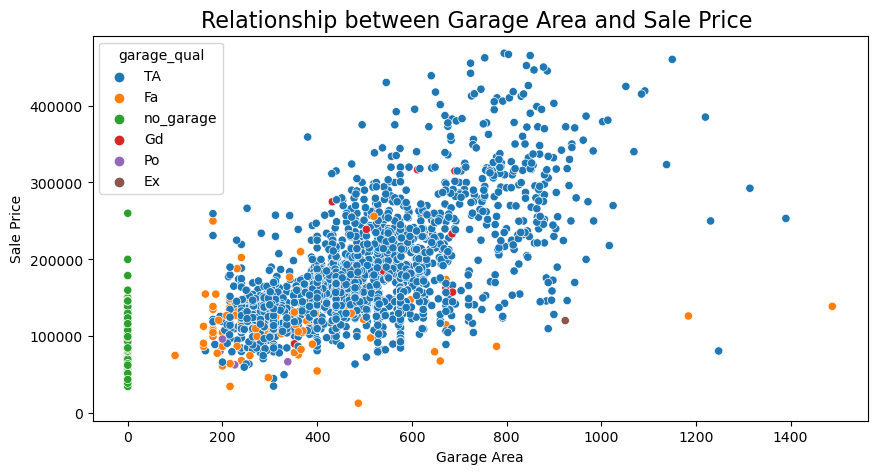

In [81]:
# Use scatterplot to display the relationship between 'garage_area' and 'saleprice'
# The bigger the garage, the higher the price
plt.figure(figsize = (10, 5))
plt.title('Relationship between Garage Area and Sale Price ',
          size = 16)

sns.scatterplot(x='garage_area', y='saleprice', hue='garage_qual'
                , data=ames_train)

plt.xlabel('Garage Area')
plt.ylabel('Sale Price');

### 3.3.7 Room size

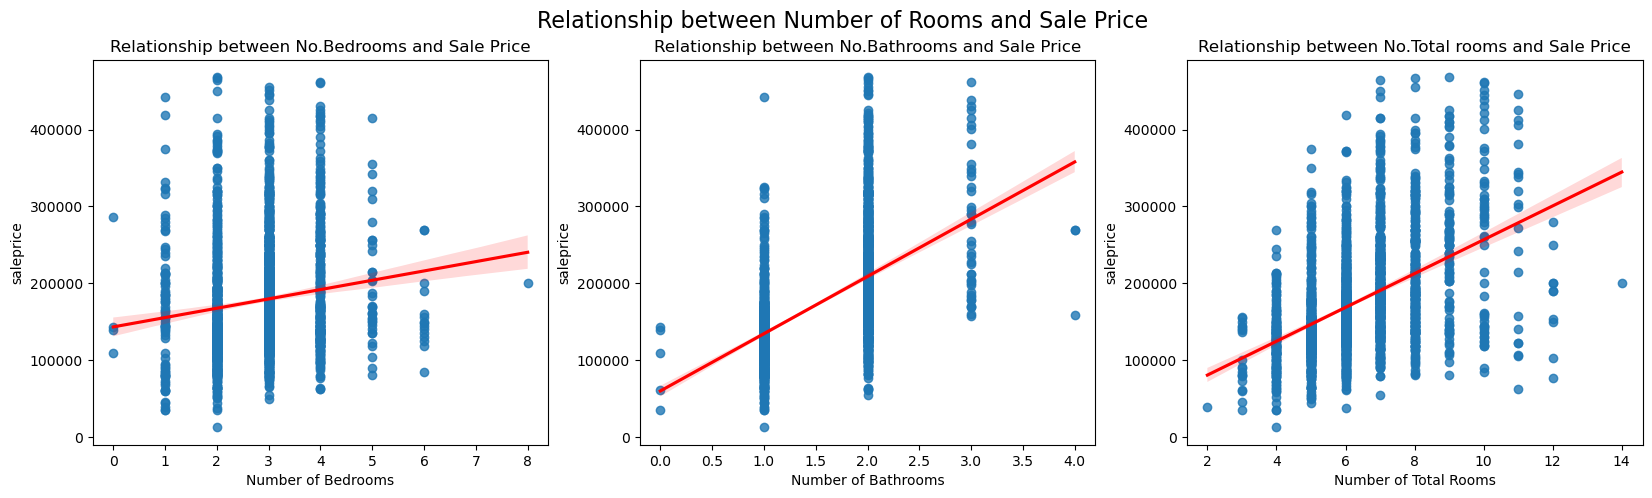

In [82]:
# Use regplot to display the relationship between number of bedrooms and sale price 
# The relationship is linear
fig, ax = plt.subplots(1, 3, figsize=(20,5))

fig.suptitle('Relationship between Number of Rooms and Sale Price', fontsize = 16)

ax[0].set_title('Relationship between No.Bedrooms and Sale Price',
          size = 12)
ax[1].set_title('Relationship between No.Bathrooms and Sale Price',
          size = 12)
ax[2].set_title('Relationship between No.Total rooms and Sale Price',
          size = 12)

sns.regplot(x='bedroom_abvgr', y='saleprice', data=ames_train,
            line_kws={"color": "red"}, ax=ax[0])
sns.regplot(x='full_bath', y='saleprice', data=ames_train,
            line_kws={"color": "red"}, ax=ax[1])
sns.regplot(x='totrms_abvgrd', y='saleprice', data=ames_train,
            line_kws={"color": "red"}, ax=ax[2]);

ax[0].set_xlabel('Number of Bedrooms')
ax[1].set_xlabel('Number of Bathrooms')
ax[2].set_xlabel('Number of Total Rooms');

### 3.3.8 Kitchen 

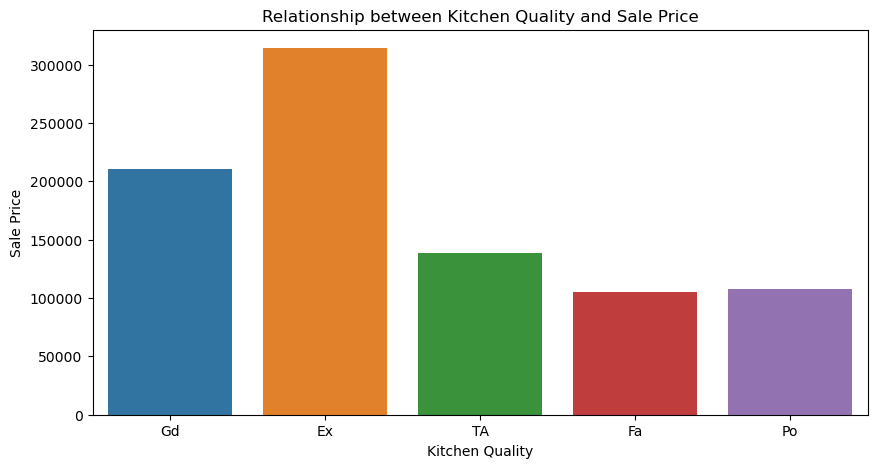

In [83]:
# Use bar chart to display the relationship between saleprice and kitchen quality 
# Houses with high kitchen quality are sold at higher price
plt.figure(figsize=(10, 5))
plt.title('Relationship between Kitchen Quality and Sale Price')

sns.barplot(x='kitchen_qual', y='saleprice', data=ames_train, ci=False)

plt.xlabel('Kitchen Quality')
plt.ylabel('Sale Price');

### 3.3.9 Foundation

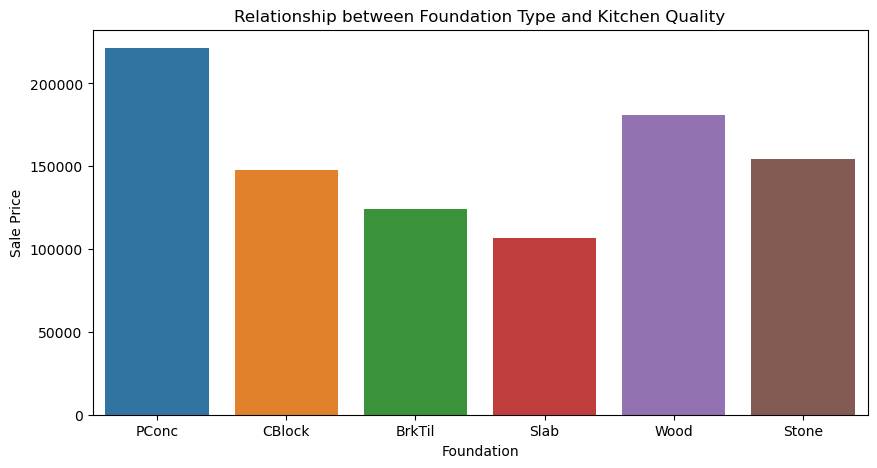

In [84]:
# Use barchart to display the relationship between foundation and kitchen quality
# Houses with poured concrete foundation are sold at the highest average price
plt.figure(figsize=(10, 5))
plt.title('Relationship between Foundation Type and Kitchen Quality')

sns.barplot(x='foundation', y='saleprice', data=ames_train, ci=False)

plt.xlabel('Foundation')
plt.ylabel('Sale Price');

### 3.3.10 House Area in Square Feet

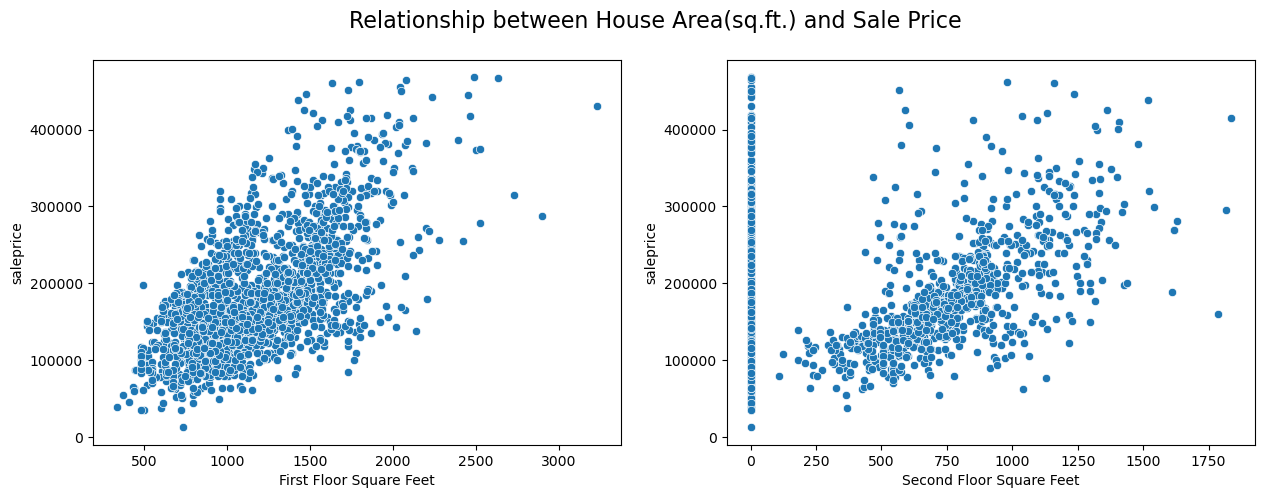

In [85]:
# Use scatterplot to display the relationship between house area and sale price
# Left = first floor, right = second floor
fig, ax = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle('Relationship between House Area(sq.ft.) and Sale Price',
             fontsize = 16)

sns.scatterplot(x='1st_flr_sf', y='saleprice', data=ames_train, ax=ax[0])
sns.scatterplot(x='2nd_flr_sf', y='saleprice', data=ames_train, ax=ax[1])

ax[0].set_xlabel('First Floor Square Feet')
ax[1].set_xlabel('Second Floor Square Feet');

In [86]:
# There are many houses that don't have second floor
# Keeping these two features together may distort the real relationship between house area and sale price
# We decide to merge 1st and 2nd floor together, creating new column called 'flr_sf' (total floor area in square feet)
ames_train['flr_sf'] = ames_train['1st_flr_sf'] + ames_train['2nd_flr_sf']

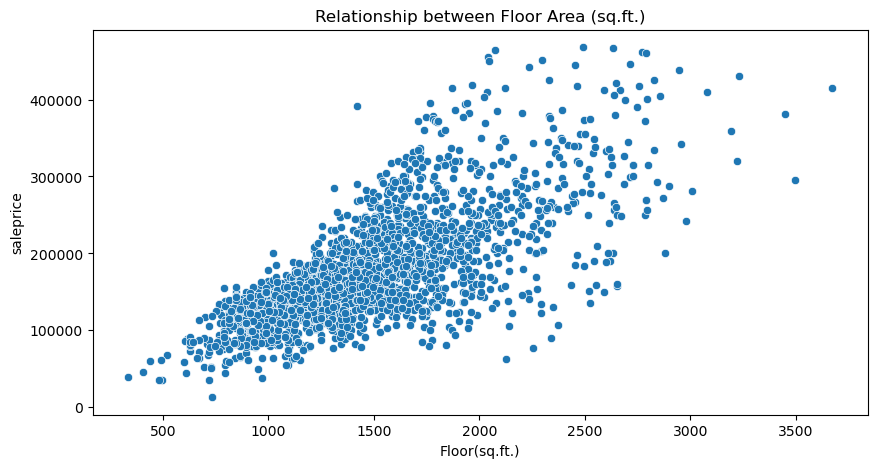

In [87]:
# Scatterplot showing the relationship between floor area and sale price
# More linear relationship!!!
plt.figure(figsize=(10, 5))
plt.title('Relationship between Floor Area (sq.ft.)')

sns.scatterplot(x='flr_sf', y='saleprice', data=ames_train)

plt.xlabel('Floor(sq.ft.)');

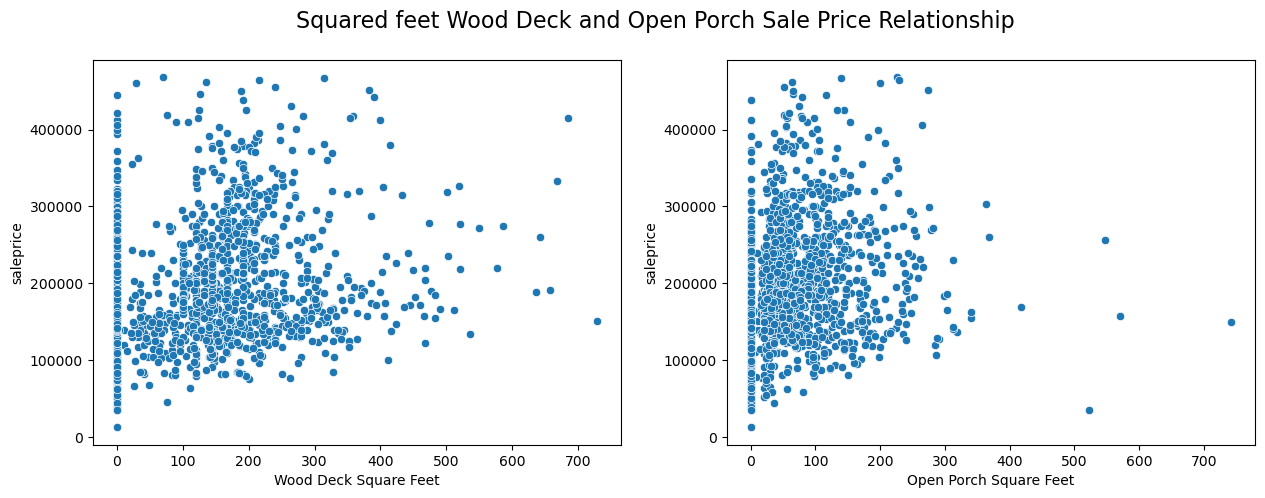

In [88]:
# Use scatterplot to display the relationship between wood deck, open porch and sale price
# There are outliers, but the score did not change much
# We decide not to drop them so that we can keep information in other columns
fig, ax = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle('Squared feet Wood Deck and Open Porch Sale Price Relationship',
             fontsize = 16)

sns.scatterplot(x='wood_deck_sf', y='saleprice', data=ames_train, ax=ax[0])
sns.scatterplot(x='open_porch_sf', y='saleprice', data=ames_train, ax=ax[1])

ax[0].set_xlabel('Wood Deck Square Feet')
ax[1].set_xlabel('Open Porch Square Feet');

### 3.3.11 Basement

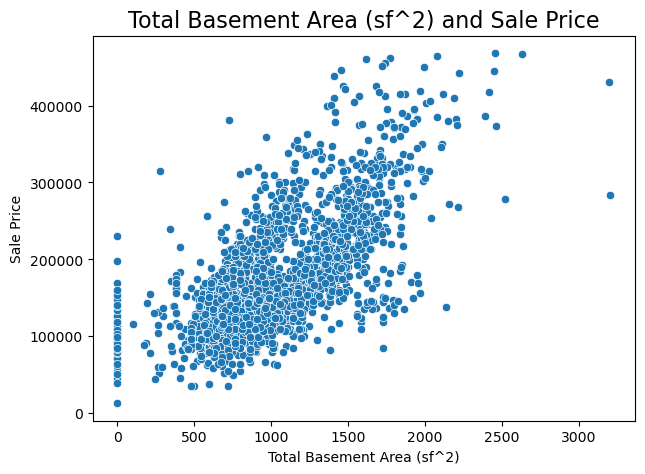

In [89]:
# Scatter plot showing the relationship between basement area and sale price 
# Linear Relationship
plt.figure(figsize=(7, 5))
plt.title('Total Basement Area (sf^2) and Sale Price', size=16)

sns.scatterplot(x='total_bsmt_sf', y='saleprice', data=ames_train)

plt.xlabel('Total Basement Area (sf^2)')
plt.ylabel('Sale Price');

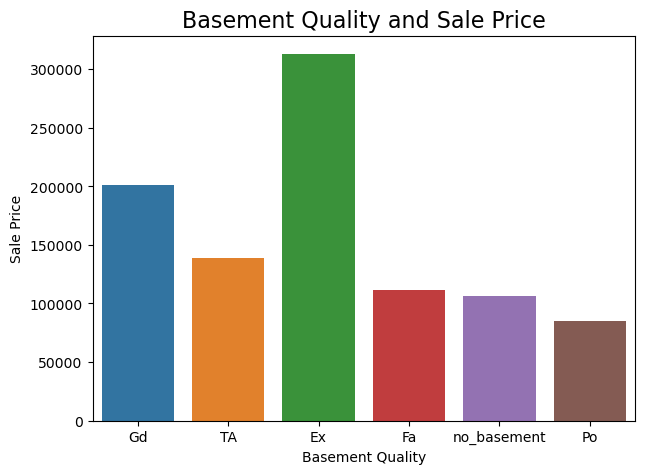

In [90]:
# Barplot showing relationship between basement quality and sale price 
# The better the basement quality, the higher the price
plt.figure(figsize=(7, 5))
plt.title('Basement Quality and Sale Price', size=16)

sns.barplot(x='bsmt_qual', y='saleprice', data=ames_train, ci=False)

plt.xlabel('Basement Quality')
plt.ylabel('Sale Price');

### 3.3.12 Miscellaneous

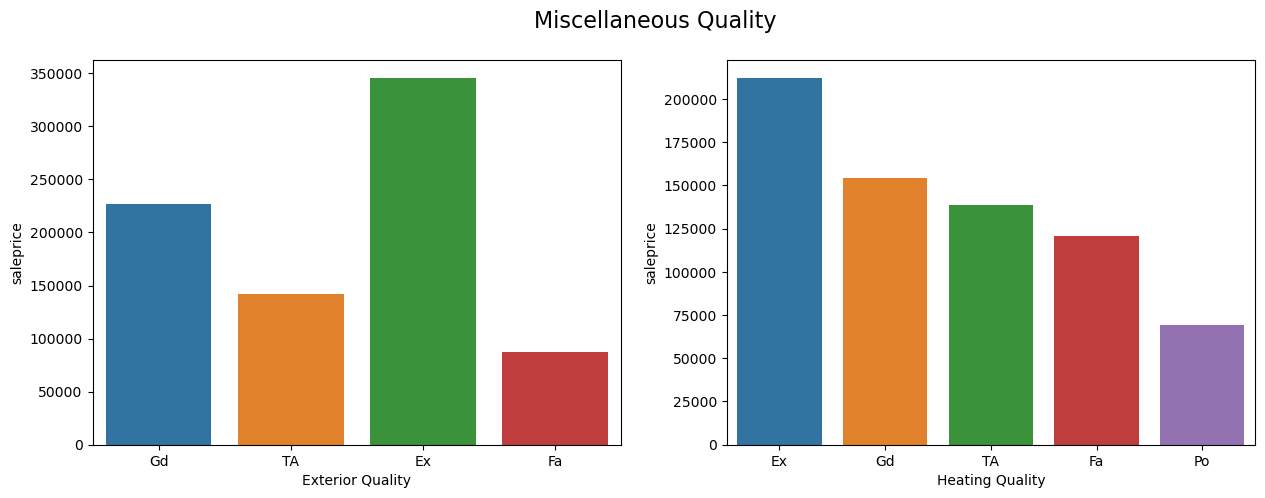

In [91]:
# The higher the quality, the higher the price
fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Miscellaneous Quality', fontsize = 16)

sns.barplot(x='exter_qual', y='saleprice', data=ames_train, ci=False, ax=ax[0])
sns.barplot(x='heating_qc', y='saleprice', data=ames_train, ci=False, ax=ax[1])

ax[0].set_xlabel('Exterior Quality')
ax[1].set_xlabel('Heating Quality');

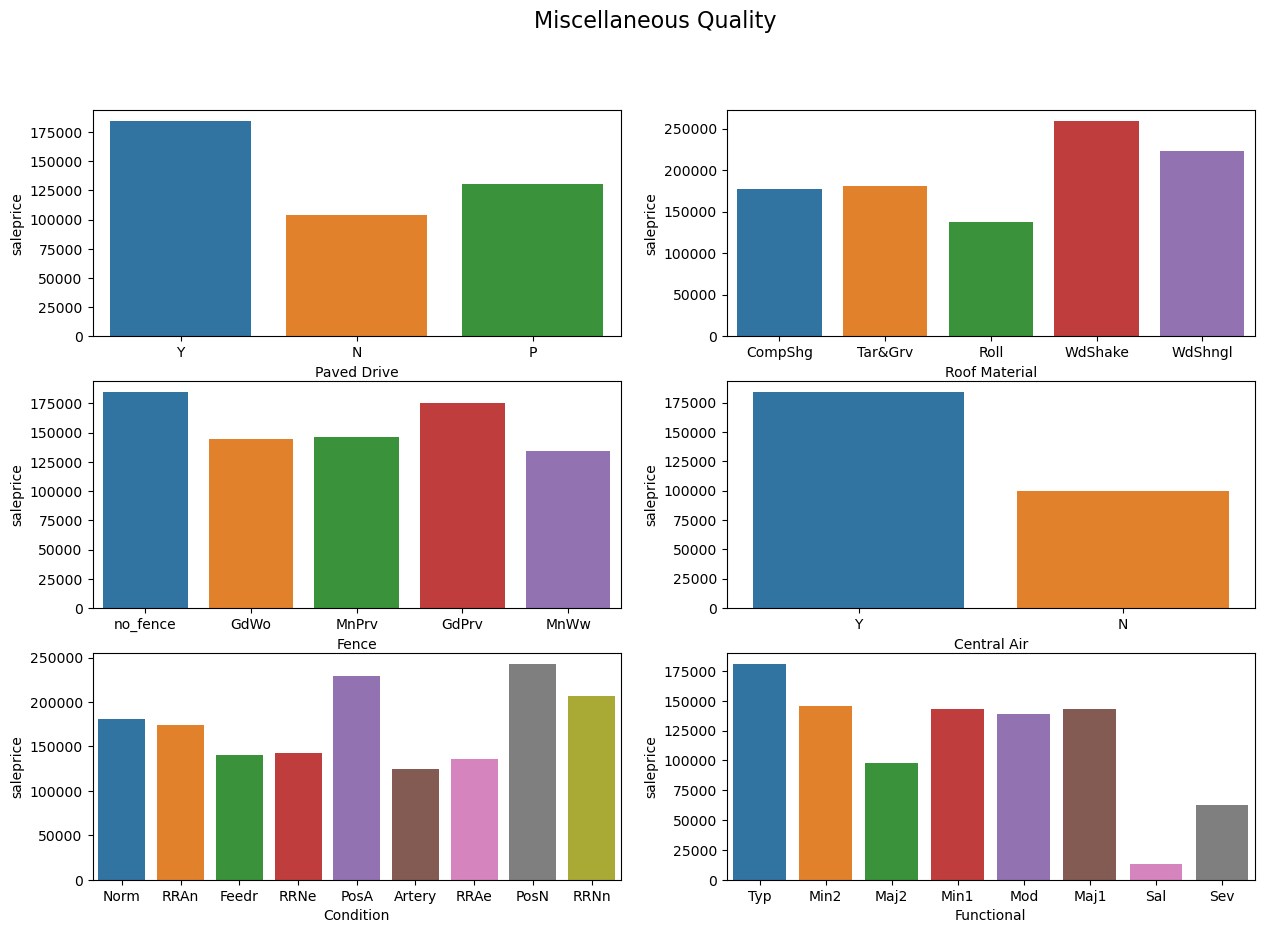

In [92]:
# We can see price difference in these features
fig, ax = plt.subplots(3, 2, figsize=(15,10))
fig.suptitle('Miscellaneous Quality', fontsize = 16)

sns.barplot(x='paved_drive', y='saleprice', data=ames_train, ci=False,
            ax=ax[0][0])
sns.barplot(x='roof_matl', y='saleprice', data=ames_train, ci=False,
            ax=ax[0][1])
sns.barplot(x='fence', y='saleprice', data=ames_train, ci=False,
            ax=ax[1][0])
sns.barplot(x='central_air', y='saleprice', data=ames_train, ci=False,
            ax=ax[1][1])
sns.barplot(x='condition_1', y='saleprice', data=ames_train, ci=False,
            ax=ax[2][0])
sns.barplot(x='functional', y='saleprice', data=ames_train, ci=False,
            ax=ax[2][1])

ax[0][0].set_xlabel('Paved Drive')
ax[0][1].set_xlabel('Roof Material')
ax[1][0].set_xlabel('Fence')
ax[1][1].set_xlabel('Central Air')
ax[2][0].set_xlabel('Condition')
ax[2][1].set_xlabel('Functional');

# Part 4: Modeling
---

Create Ames price prediction model by using linear regression

## 4.1 First Model
---

### 4.1.1 Create Model

In [93]:
# Features selection
features =  ['flr_sf', 'garage_area', 'total_bsmt_sf', 'year_built', 'full_bath'
             , 'lot_area', 'overall_cond', 'lot_frontage', 'wood_deck_sf', 'open_porch_sf','totrms_abvgrd',
             'ms_zoning', 'ms_subclass', 'neighborhood', 'central_air',
            'condition_1', 'bsmt_qual','paved_drive', 'exter_qual', 'foundation'
             , 'heating_qc', 'house_style', 'kitchen_qual', 'roof_matl', 'functional']

In [94]:
# Assign features in X and target in y
X = ames_train[features]
y = ames_train['saleprice']

In [95]:
# Create dummy variable in X features
X_dummies = pd.get_dummies(X, drop_first=True) 
X_dummies.shape

C:\Users\Win10\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


(2110, 107)

In [96]:
# Create train and validation dataset
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y,
                                                    random_state=66)

In [97]:
# Instantiate linear model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [98]:
# Cross Val Score - return R^2
cross_val_score(lr, X_train, y_train)

array([0.89234437, 0.91677193, 0.89723384, 0.908242  , 0.90867014])

In [99]:
# Check the R^2 score on train dataset
lr.score(X_train, y_train)

0.9209794863399061

In [100]:
# Check the R^2 score on test dataset
lr.score(X_test, y_test)

0.9106018317535899

In [101]:
# Calculate y_preds values
y_preds = lr.predict(X_test)

In [102]:
# Calculate RMSE
metrics.mean_squared_error(y_test, y_preds, squared=False)

21956.32680610425

### 4.1.2 LINEM Assumptions

In [103]:
# Caluculate Residuals
residuals = y_test - y_preds

C:\Users\Win10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


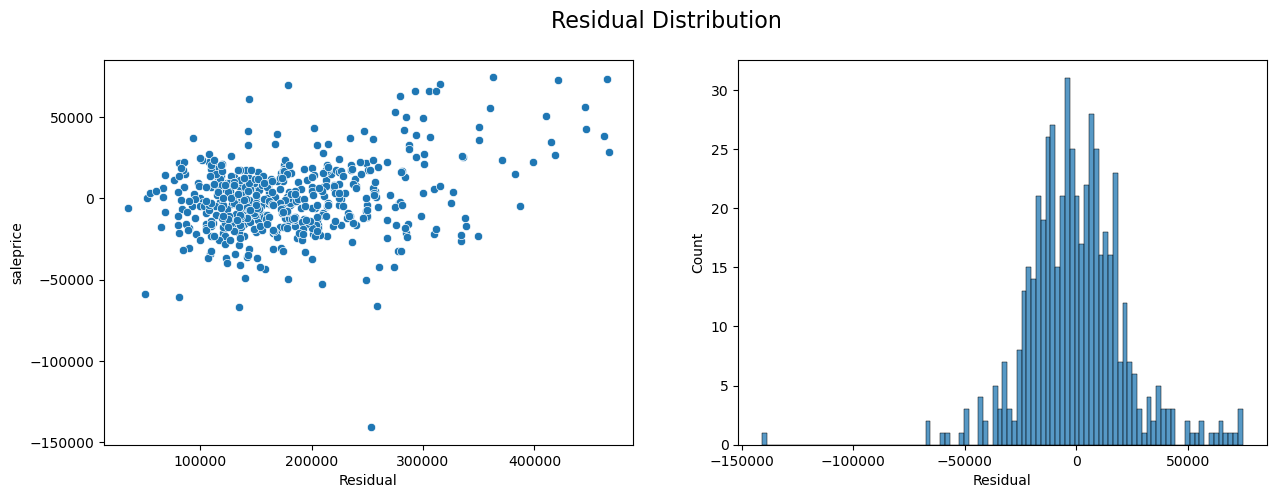

In [104]:
# Residuals displayed in scatterplot and histogram
fig, ax = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle('Residual Distribution', fontsize = 16)

sns.scatterplot(y_test,residuals, ax=ax[0])
sns.histplot(residuals, bins=100, ax=ax[1])

ax[0].set(xlabel='Residual')
ax[1].set(xlabel='Residual');

In [105]:
# Find index of residual that are lower than -100_000
residuals[residuals < -100_000]

1025   -140867.130365
Name: saleprice, dtype: float64

In [106]:
# Drop index 1025 because it is an outlier
ames_train.drop([1025], inplace=True)

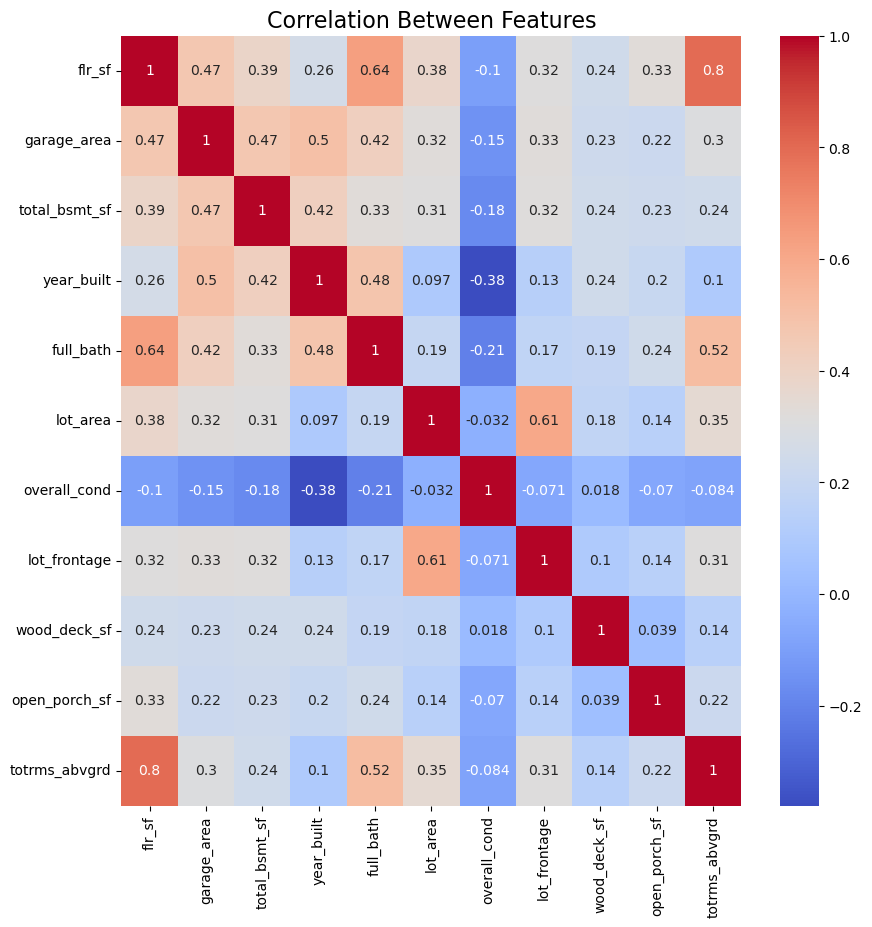

In [107]:
# Check multicolinearity by using heatmap
# Drop 'totrm_abvgrd' (total room above the grade(ground)) because it has high multicollinearity
plt.figure(figsize=(10,10))
plt.title('Correlation Between Features', size = 16)
sns.heatmap(X.corr(), annot=True,cmap='coolwarm');

## 4.2 Second Model

### 4.2.1 Create Model

In [108]:
# Features selection
features =  ['flr_sf', 'garage_area', 'total_bsmt_sf', 'year_built', 'full_bath'
             , 'lot_area', 'overall_cond', 'lot_frontage', 'wood_deck_sf', 'open_porch_sf',
             'ms_zoning', 'ms_subclass', 'neighborhood', 'central_air',
            'condition_1', 'bsmt_qual','paved_drive', 'exter_qual', 'foundation'
             , 'heating_qc', 'house_style', 'kitchen_qual', 'roof_matl', 'functional']

In [109]:
# Assign features in X and target in y
X = ames_train[features]
y = ames_train['saleprice']

In [110]:
# Create dummy variable in X features
X_dummies = pd.get_dummies(X, drop_first=True) 
X_dummies.shape

C:\Users\Win10\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


(2109, 106)

In [111]:
# Create train and validation dataset
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y,
                                                    random_state=66)

# Train model
lr.fit(X_train, y_train)

LinearRegression()

In [112]:
# Cross Val Score - return R^2
cross_val_score(lr, X_train, y_train)

array([0.89023773, 0.89431921, 0.90688119, 0.91100394, 0.90907609])

In [113]:
# Check the R^2 score on train dataset
lr.score(X_train, y_train)

0.9192060247737163

In [114]:
# Check the R^2 score on test dataset
lr.score(X_test, y_test)

0.9202685236471453

In [115]:
# Calculate y_preds values
y_preds = lr.predict(X_test)

In [116]:
# Calculate RMSE
metrics.mean_squared_error(y_test, y_preds, squared=False)

21243.2478340805

### 4.2.2 LINEM Assumptions

In [117]:
# Caluculate Residuals
residuals = y_test - y_preds

C:\Users\Win10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


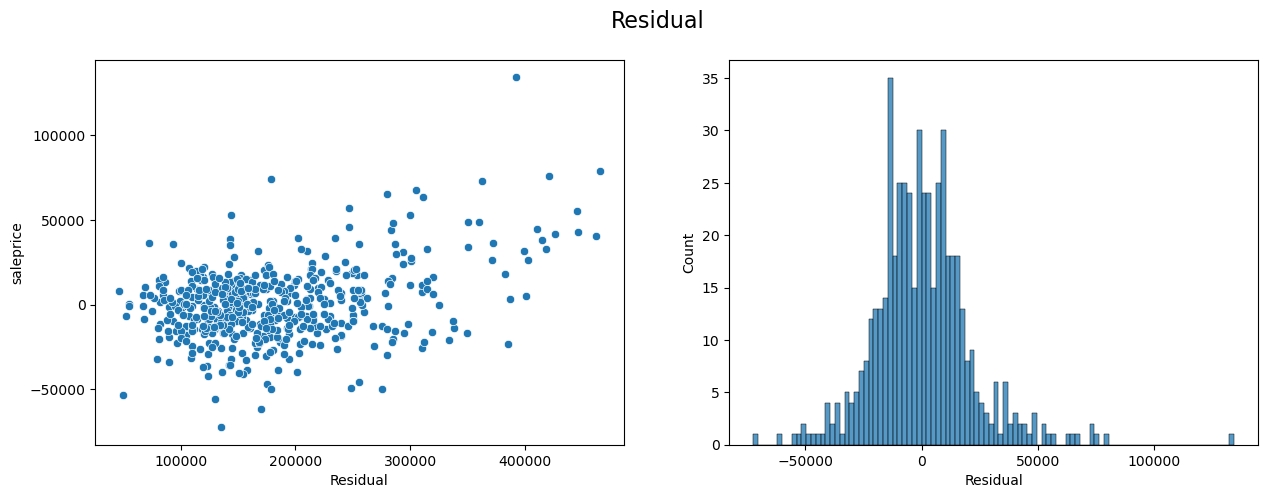

In [118]:
# Residuals scatterplot and distribution
fig, ax = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle('Residual', fontsize = 16)

sns.scatterplot(y_test,residuals, ax=ax[0])
sns.histplot(residuals, bins=100, ax=ax[1])

ax[0].set(xlabel='Residual')
ax[1].set(xlabel='Residual');

In [119]:
# Find index of the residual that is higher than 100,000
residuals[residuals > 100_000]

2135    134274.403274
Name: saleprice, dtype: float64

In [120]:
# Crop index 2135
ames_train.drop([2135], inplace=True)

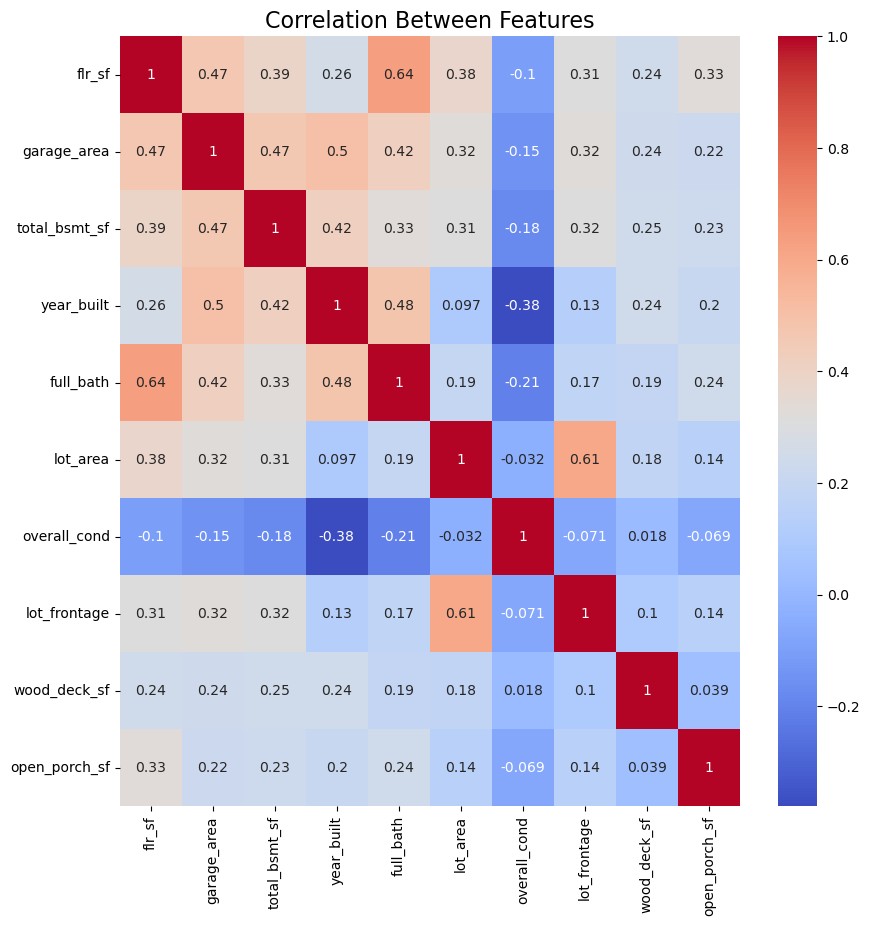

In [121]:
# Check multicollinearity
plt.figure(figsize=(10,10))
plt.title('Correlation Between Features', size = 16)
sns.heatmap(X.corr(), annot=True,cmap='coolwarm');

## 4.3 Final Model

### 4.3.1 Create Model

In [122]:
# Assign features in X and target in y
X = ames_train[features]
y = ames_train['saleprice']

In [123]:
# Create dummy variable in X features
X_dummies = pd.get_dummies(X, drop_first=True) 
X_dummies.shape

C:\Users\Win10\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


(2108, 106)

In [124]:
# Create train and validation dataset
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y,
                                                    random_state=66)

# Train model
lr.fit(X_train, y_train)

LinearRegression()

In [125]:
# Cross Val Score - return R^2
cross_val_score(lr, X_train, y_train)

array([0.9051393 , 0.92911857, 0.91162891, 0.90534742, 0.9153358 ])

In [126]:
# Check the R^2 score on train dataset
lr.score(X_train, y_train)

0.926603705287461

In [127]:
# Check the R^2 score on test dataset
lr.score(X_test, y_test)

0.8993693975044015

In [128]:
# Calculate y_hat values
y_preds = lr.predict(X_test)

In [129]:
# Calculate RMSE
metrics.mean_squared_error(y_test, y_preds, squared=False)

21795.51058656311

### 4.3.2 LINEM Assumptions

In [130]:
# Caluculate Residuals
residuals = y_test - y_preds

C:\Users\Win10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


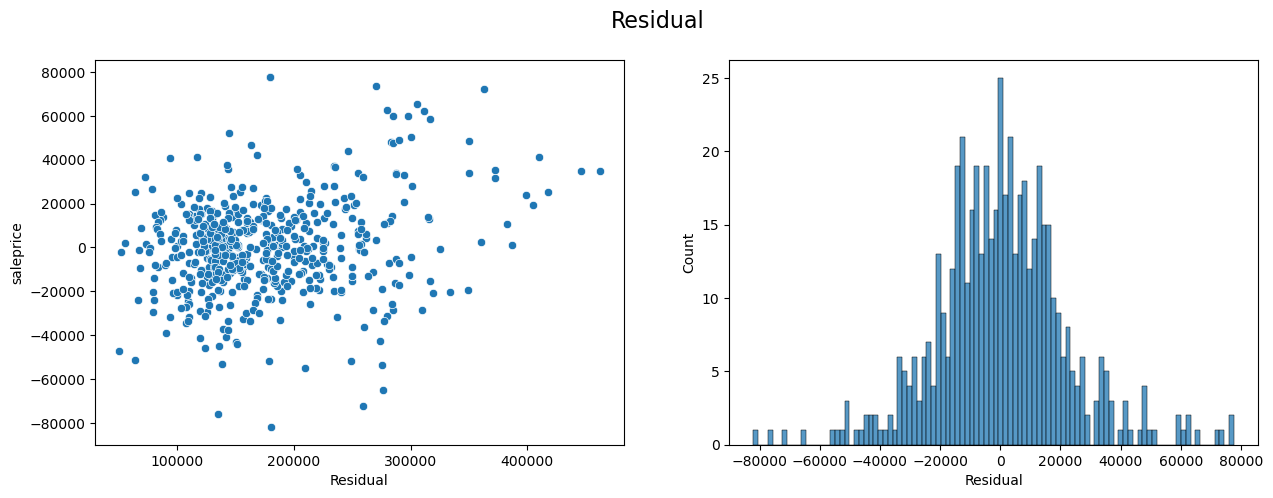

In [131]:
# Residuals scatterplot and distribution
fig, ax = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle('Residual', fontsize = 16)

sns.scatterplot(y_test,residuals, ax=ax[0])
sns.histplot(residuals, bins=100, ax=ax[1])

ax[0].set(xlabel='Residual')
ax[1].set(xlabel='Residual');

### 4.3.3 Ridge

In [132]:
# Create train/test splits
X_train, X_test, y_train, y_test = train_test_split(
    X_dummies,
    y
)

In [133]:
# Scale data
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [134]:
# Set up a list of Lasso alphas for examination.
alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of Lasso alphas.
ridge_cv = RidgeCV(alphas = alphas, cv=5)

# Fit model 
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5)

In [135]:
# Score
print(f'Training RMSE score: {metrics.mean_squared_error(y_train, ridge_cv.predict(Z_train), squared=False)}')
print(f'Testing RMSE score: {metrics.mean_squared_error(y_test, ridge_cv.predict(Z_test), squared=False)}')

Training RMSE score: 20370.538617497583
Testing RMSE score: 20249.189936519146


### 4.3.4 Lasso

In [136]:
# Create train/test splits
X_train, X_test, y_train, y_test = train_test_split(
    X_dummies,
    y
)

In [137]:
# Scale data
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [138]:
# Set up a list of Lasso alphas for examination.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas)

In [139]:
# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train)

C:\Users\Win10\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3584979714.0618896, tolerance: 664191983.0534
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Win10\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2944964868.305542, tolerance: 663307771.4319336
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Win10\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3293381340.885193, tolerance: 644767976.9958495
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Win10\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: Conv

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]))

In [140]:
# Score
print(f'Training RMSE score: {metrics.mean_squared_error(y_train, lasso_cv.predict(Z_train), squared=False)}')
print(f'Testing RMSE score: {metrics.mean_squared_error(y_test, lasso_cv.predict(Z_test), squared=False)}')

Training RMSE score: 20053.11668207033
Testing RMSE score: 21142.507302439335


In [141]:
# Check coefficients after used lasso.
lasso_coefs = lasso_cv.coef_
lasso_coefs = pd.Series(lasso_coefs, X_dummies.columns)
print(len(lasso_coefs[lasso_coefs != 0].sort_values(ascending=False)))
lasso_coefs[lasso_coefs != 0].sort_values(ascending=False).head(10)

103


flr_sf                27945.566893
year_built            15312.219318
total_bsmt_sf         13509.340969
overall_cond           7993.168792
garage_area            5984.276724
lot_area               5520.691218
house_style_SFoyer     4466.721364
house_style_SLvl       4105.143544
functional_Typ         3903.618026
condition_1_Norm       3635.141989
dtype: float64

### 4.3.5 Baseline

In [142]:
# Regressor dummy
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
dummy_preds = dummy.predict(X_test)
print(f'RMSE score: {metrics.mean_squared_error(y_test, dummy_preds, squared=False)}')

RMSE score: 69692.89314157928


## 4.4 Apply Model on Test Data

In [144]:
# Import test dataset
ames_test = pd.read_csv('../data/test.csv')

### 4.4.1 Clean Test Data

In [145]:
# Convert all upper case in column names into lowercase and replace blank space with underscore (_)
ames_test.columns = ames_test.columns.str.lower().str.replace(' ', '_')

In [146]:
ames_test.isna().sum().sort_values(ascending=False)

pool_qc           732
misc_feature      707
alley             678
fence             580
fireplace_qu      356
                 ... 
exterior_2nd        0
exterior_1st        0
roof_matl           0
roof_style          0
sale_condition      0
Length: 81, dtype: int64

In [147]:
# 1st and 2nd flr sf summission to flr sf
ames_test['flr_sf'] = ames_test['1st_flr_sf'] + ames_test['2nd_flr_sf']

In [148]:
# Fill na in lot_frontage , lot_config == corner
mask = (ames_test['lot_config'] == 'Corner')
ames_test.loc[mask, 'lot_frontage'] = ames_test.loc[mask, 'lot_frontage'].fillna(median_corner)

In [149]:
# Fill na in lot_frontage , lot_config == CulDSac
mask = (ames_test['lot_config'] == 'CulDSac')
ames_test.loc[mask, 'lot_frontage'] = ames_test.loc[mask, 'lot_frontage'].fillna(median_culdsac)

In [150]:
# Fill na in lot_frontage , lot_config == FR2
mask = (ames_test['lot_config'] == 'FR2')
ames_test.loc[mask, 'lot_frontage'] = ames_test.loc[mask, 'lot_frontage'].fillna(median_fr2)

In [151]:
# Fill na in lot_frontage , lot_config == FR3
mask = (ames_test['lot_config'] == 'FR3')
ames_test.loc[mask, 'lot_frontage'] = ames_test.loc[mask, 'lot_frontage'].fillna(median_fr3)

In [152]:
# Fill na in lot_frontage , lot_config == Inside
mask = (ames_test['lot_config'] == 'Inside')
ames_test.loc[mask, 'lot_frontage'] = ames_test.loc[mask, 'lot_frontage'].fillna(median_inside)

In [153]:
# Fill na with correct values in total_bsmt_sf column
ames_test['total_bsmt_sf'].fillna(0, inplace=True)

### 4.4.2 Predict Test Data

In [154]:
# assign values
X_test_2nd = ames_test
X_test_2nd_dummies = pd.get_dummies(X_test_2nd, drop_first=True)

In [155]:
# Get missing columns in the training test
missing_cols = set( X_dummies.columns ) - set( X_test_2nd_dummies.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test_2nd_dummies[c] = 0
# Ensure that the order of columns in the test set is in the same order as in the train set
X_test_2nd_dummies = X_test_2nd_dummies[X_dummies.columns]

In [156]:
# generate prediction
lr_preds = lr.predict(X_test_2nd_dummies)

In [157]:
# Standardization of test data
# Scale data
Z = sc.transform(X_test_2nd_dummies)

In [158]:
# generate prediction using ridge
ri_preds = ridge_cv.predict(Z)

In [159]:
# generate prediction using lasso
la_preds = lasso_cv.predict(Z)

## 4.5 Create Submission File

In [160]:
# import dataset
order_test = pd.read_csv('../data/test.csv')

In [161]:
## create dataframe with "Order" and prediction
pred_df = pd.DataFrame({'Order':order_test['Order'], 'SalePrice':ri_preds})
pred_df.to_csv('../data/submission.csv', index=False)

**Score on Kaggle**: RMSE 
- **Linear Regression**: 28523
- **Ridge**: 27933
- **Lasso**: 27936

# Part 5: Conclusion and Recommendation

## 5.1 Conclusion

To sum up, the final model is an actionable and explainable price model based on the current dataset. This model can surely be used by the city of Ames for the purpose of developing an equal and affordable housing policy as well as urban planning programme. Furthermore, the Housing Devision of Ames can also use this model to adjust the appropriate appraisal prices to ensure the accurate tax collection.

## 5.2 Recommendation

As in outlook into the future, it should be taken in cosideration that there are liminations in the final model. Firstly, the features available in the datasets are mostly physical features of houses. Therefore, it lacks other contextual features such as approximity to parks, schools, supermarkets, etc, which may strongly affect house prices. Furthermore, the current data from 2010 do not capture the situation in 2022. It is highly suggested that City of Ames collect new, updated data with more contextual features. Lastly, it cannot be denied that linear regression model may have less predictive power than other alternatives. Therefore, using other model to predict house prices is also worth considering.


---